In [2]:
import numpy as np
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import neighbors, model_selection, tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import math


# Análisis del dataframe

In [4]:
dataset = pd.read_csv('all_stocks_5yr.csv', na_values= '?')
nombreColumnas = ['date', 'open', 'high', 'low', 'close','volume','Name']
#vemos descripcion de los datos
dataset.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


Se puede observar que los valores de open y close son muy similares, el de high es superior a estos y el de low es inferior lo cual tiene sentido.

Veamos algunas de las empresas con mayor tráfico de acciones de media

In [5]:
#ordenar nombres por media acciones
mas_acciones=dataset.groupby(['Name']).volume.mean().sort_values(ascending=False)
mas_acciones=mas_acciones.iloc[0:10]
print(mas_acciones)

Name
BAC     9.363380e+07
AAPL    5.404790e+07
GE      4.211568e+07
F       3.446237e+07
FB      3.435927e+07
MSFT    3.386946e+07
AMD     3.251904e+07
MU      3.024841e+07
INTC    2.932671e+07
CSCO    2.865435e+07
Name: volume, dtype: float64


Como se puede observar algunas de las más destacadas son Apple, General Electric, ford,Microsoft o Facebook. 

Veamos algunas de las empresas con mayor valor de sus acciones de 

In [6]:
mas_alto=dataset.groupby(['Name']).high.mean().sort_values(ascending=False)
mas_alto=mas_alto.iloc[0:10]
print(mas_alto)

Name
PCLN     1324.183184
GOOG      730.822248
GOOGL     687.362776
AZO       624.936338
AMZN      582.017221
CMG       498.601756
REGN      387.481457
MTD       359.263210
BLK       351.447511
BIIB      299.297485
Name: high, dtype: float64


Como se puede observar algunas de las más destacadas son Google,Amazon o BlackRock que curiosamente es una empresa que se dedica a la gestión de inversiones.

Empresas con picos más alto del valor de sus acciones

In [7]:
pico_mas_alto=dataset.groupby(['Name']).high.max().sort_values(ascending=False)
pico_mas_alto=pico_mas_alto.iloc[0:10]
print(pico_mas_alto)

Name
PCLN     2067.9900
AMZN     1498.0000
GOOGL    1198.0000
GOOG     1186.8900
AZO       819.5400
CMG       758.6100
MTD       697.2600
REGN      605.9299
BLK       594.5200
EQIX      495.3450
Name: high, dtype: float64


Como se puede observar los valores más altos son alcanzados por las empresas que suelen tener valores más altos habitualmente

# Graficas

Vamos a analizar las tendencias de algunas de las empresas más mimportante

In [8]:
bac= dataset[dataset['Name']=='BAC']
aapl= dataset[dataset['Name']=='AAPL']
ge= dataset[dataset['Name']=='GE']
pcln= dataset[dataset['Name']=='PCLN']

In [9]:
bac_df = bac.copy()
aapl_df = aapl.copy()
ge_df = ge.copy()
pcln_df = pcln.copy()

bac_df.loc[:, 'date'] = pd.to_datetime(bac_df.loc[:,'date'], format="%Y/%m/%d")
aapl_df.loc[:, 'date'] = pd.to_datetime(aapl_df.loc[:,'date'], format="%Y/%m/%d")
ge_df.loc[:, 'date'] = pd.to_datetime(ge_df.loc[:,'date'], format="%Y/%m/%d")
pcln_df.loc[:, 'date'] = pd.to_datetime(pcln_df.loc[:,'date'], format="%Y/%m/%d")

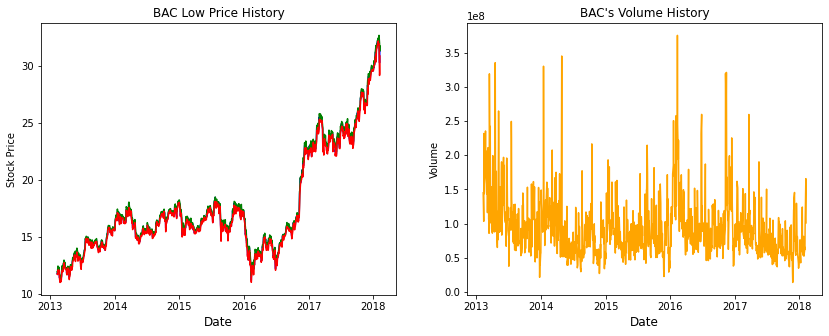

In [10]:
# Simple plotting of BAC Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(bac_df["date"], bac_df["close"], color = "blue")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("BAC Close Price History")
# Second Subplot
ax1.plot(bac_df["date"], bac_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("BAC High Price History")
# Third Subplot
ax1.plot(bac_df["date"], bac_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("BAC Low Price History")
# Fourth Subplot
ax2.plot(bac_df["date"], bac_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("BAC's Volume History")
plt.show()

Como se puede observar el banco de américa tiene un tendencia positiva los últimos tiempos

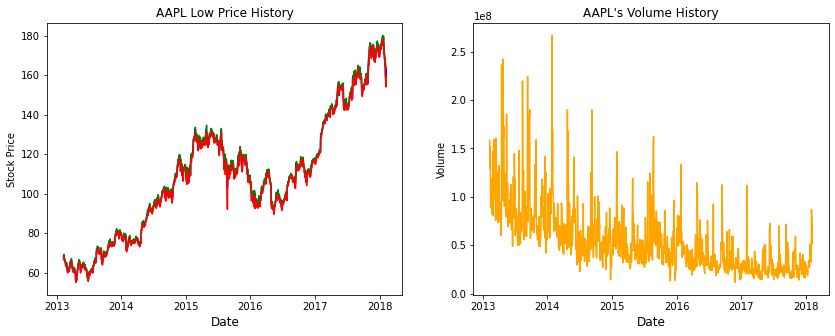

In [11]:
# Simple plotting of APPLE Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(aapl_df["date"], aapl_df["close"], color = "blue")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("AAPL Close Price History")
# Second Subplot
ax1.plot(aapl_df["date"], aapl_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("AAPL High Price History")
# Third Subplot
ax1.plot(aapl_df["date"], aapl_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("AAPL Low Price History")
# Fourth Subplot
ax2.plot(aapl_df["date"], aapl_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("AAPL's Volume History")
plt.show()

Apple también sigue una dinámica positiva

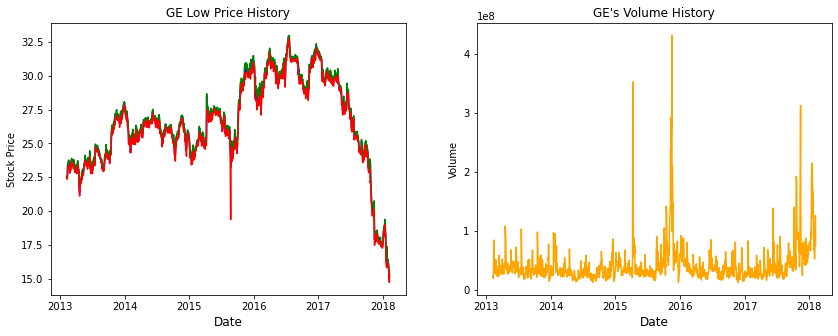

In [12]:
# Simple plotting of GE Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(ge_df["date"], ge_df["close"], color = "blue")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("GE Close Price History")
# Second Subplot
ax1.plot(ge_df["date"], ge_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("GE High Price History")
# Third Subplot
ax1.plot(ge_df["date"], ge_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("GE Low Price History")
# Fourth Subplot
ax2.plot(ge_df["date"], ge_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("GE's Volume History")
plt.show()

Al contrario de las anteriores General Electric ha bajado su valor respecto a los últimos años.

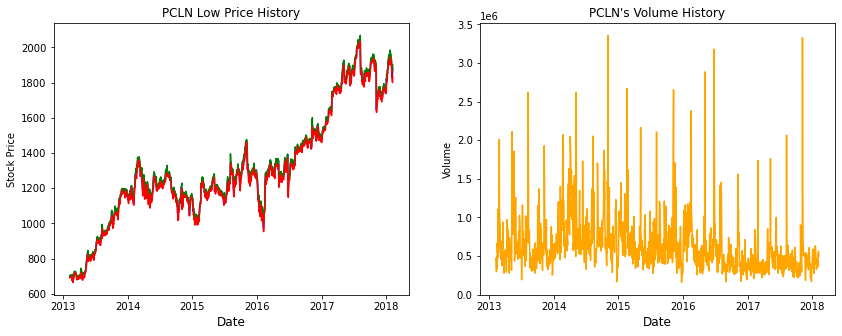

In [13]:
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(pcln_df["date"], pcln_df["close"], color = "blue")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("PCLN Close Price History")
# Second Subplot
ax1.plot(pcln_df["date"], pcln_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("PCLN High Price History")
# Third Subplot
ax1.plot(pcln_df["date"], pcln_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("PCLN Low Price History")
# Fourth Subplot
ax2.plot(pcln_df["date"], pcln_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("PCLN's Volume History")
plt.show()

Booking Holdings tiene una dinámica ascendente  y su valor está muy por encima de las anteriores.

# Detección incongruencias

Aquí miramos si hay duplicidades en la fecha de una misma empresa.

In [14]:
empresas=np.unique(dataset['Name'].values)
for name in empresas:
    datos=dataset[dataset['Name']==name]
    if(len(datos.date.unique())!=len(datos)):
        print("incongruencia")

Como hemos podido observar las fechas para los datos de una misma empresa no se repiten

# Variable date

In [15]:
dataset.date = pd.to_datetime(dataset.date)
dataset['Dia'] = dataset.date.dt.day
dataset['Mes'] = dataset.date.dt.month
dataset['Año'] = dataset.date.dt.year

Aquí hemos creado nuevas variables para trabajar con la fecha de forma numérica.

# Imputación de valores perdidos

Vamos a tratar los valores pérdidos mediante distintos métodos de imputación.Nos quedaremos con el que creamos más conveniente.

In [16]:
#funcion que obtiene filas con nulls
def filasConNulls(dataset):
    is_NaN = dataset.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = dataset[row_has_NaN]
    return rows_with_NaN

In [17]:
#funcion que elimina las filas con nulls
def eliminarNulls(dataset,filas):
    dataset.drop(filas, inplace=True)
    return dataset

In [18]:
#Funcion que devuelve una lista con valores True en las posiciones que corresponde a columnas nulas
def determinar_valores_perdidos(dataset, nombreColumnas):
    resultados_por_columnas = []
    for nombre in nombreColumnas:
        res = dataset[nombre].isnull().values.any()
        resultados_por_columnas.append(res)
    return resultados_por_columnas

In [19]:
#obtengo columnas con valores perdidos
variables_con_null = determinar_valores_perdidos(dataset, nombreColumnas)
#obtengo filas con valores perdidos
indicesNulls=filasConNulls(dataset)
print(variables_con_null)
print(indicesNulls)

[False, True, True, True, False, False, False]
             date  open   high    low     close   volume  Name  Dia  Mes   Año
82949  2017-07-26   NaN    NaN    NaN   69.0842        3   BHF   26    7  2017
165734 2015-07-17   NaN  88.76  88.24   88.7200  2056819   DHR   17    7  2015
165857 2016-01-12   NaN    NaN    NaN   88.5500        0   DHR   12    1  2016
205076 2015-07-17   NaN  48.49  47.85   47.9200  1246786    ES   17    7  2015
239832 2016-07-01   NaN    NaN    NaN   49.5400        0   FTV    1    7  2016
434379 2015-07-17   NaN  47.31  46.83   46.9900  1229513     O   17    7  2015
434502 2016-01-12   NaN    NaN    NaN   52.4300        0     O   12    1  2016
478594 2015-06-09   NaN    NaN    NaN  526.0900    12135  REGN    9    6  2015
558213 2016-04-07   NaN    NaN    NaN   41.5600        0    UA    7    4  2016
581906 2015-05-12   NaN    NaN    NaN  124.0800   569747  VRTX   12    5  2015
598236 2015-06-26   NaN    NaN    NaN   61.9000      100   WRK   26    6  2015


Como se puede apreciar en un dataframe tan grande como el que tenemos solo existen 11 filas con valores perdidos por lo que una solución muy razonable y sencilla es eliminar las filas afectadas. Aun así probaremos otros métodos.Al ver las filas afectadas se puede apreciar que en las filas afectadas falta más de un valor por lo que se pueden descartar algunos métodos como la imputación a través de la regresión. Tampoco tiene sentido hacer distintos datasets probando con cada valor de la clase ya que habría demasiadas posibilidades y muchas de ellas no tendrían sentido.
También se aprecia que las columnas con valores nulos son open,high y low.
Por último es apreciable que muchos de los valores de volume no son los adecuados en las filas con valores nulos, presentan inconsistencias. Esta es una forma de tratar los outliers.

In [20]:
indices_volume=(indicesNulls.index[0],indicesNulls.index[2],indicesNulls.index[4],indicesNulls.index[6],indicesNulls.index[8],indicesNulls.index[10])

Como hemos dicho los valores de volume en las filas con nulos son datos no válidos ya que son muy inferiores al resto. Por lo tanto, los trataremos como valores perdidos para ello los ponemos en nulo.

In [21]:
def crearNulos(dataset,indices):
    for fila in (indices):
        dataset.loc[fila,'volume']=np.nan
    return dataset

In [22]:
dataset=crearNulos(dataset,indices_volume)

ahora tratamos esos valores como null

In [23]:
#Método más sencillo eliminar las filas con valores perdidos
dataset_sin_nulls=dataset.copy()
dataset_sin_nulls=eliminarNulls(dataset_sin_nulls, indicesNulls.index)

Al ser un dataframe tan grandes y haber tan pocos valores perdidos es una opción muy razonable.

In [24]:
#funcion sustituye nulls por media en columnas
def sustituirMedia(dataset):
    nombres_variables_numericas=dataset.select_dtypes(exclude='object').columns
    nombres_variables_categoricas=dataset.select_dtypes(include='object').columns
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    transformacion=[('transformacionnumerica', imp_mean, nombres_variables_numericas)]
    preprocesamiento=ColumnTransformer(transformers=transformacion)
    dataset_sin_missing = dataset.copy()
    dataset_sin_missing=preprocesamiento.fit_transform(dataset)
    dataset_sin_missing=pd.DataFrame(data=dataset_sin_missing,index=dataset.index,columns=np.array(nombres_variables_numericas))
    return dataset_sin_missing

In [25]:
#Sustituir por la media de la variable
aux_media=sustituirMedia(dataset[nombreColumnas[1:6]])
dataset_media=dataset.copy()
dataset_media[nombreColumnas[1:6]]=aux_media[nombreColumnas[1:6]]

Sustituir por la media de la variable no es la solución más precisa ya que incluye a muchas empresas y no sólo a la del valor perdido

In [26]:
#funcion sustituye nulls por media en columnas de su misma empresa
def sustituirMediaEmpresa(dataset,indicesNulls):
    dataset_media_empresa=dataset.copy()
    for fila in (indicesNulls.index):
        empresa=dataset_media_empresa.Name.iloc[fila]
        if(math.isnan(dataset_media_empresa.iloc[fila]['open'])):
            medias_open=dataset_media_empresa.groupby(['Name']).open.mean()
            media_open=medias_open.loc[empresa]
            dataset_media_empresa.at[fila,'open']=media_open
        if(math.isnan(dataset_media_empresa.iloc[fila]['high'])):
            medias_high=dataset_media_empresa.groupby(['Name']).high.mean()
            media_high=medias_high.loc[empresa]
            dataset_media_empresa.at[fila,'high']=media_high
        if(math.isnan(dataset_media_empresa.iloc[fila]['low'])):
            medias_low=dataset_media_empresa.groupby(['Name']).low.mean()
            media_low=medias_low.loc[empresa]
            dataset_media_empresa.at[fila,'low']=media_low
        if(math.isnan(dataset_media_empresa.iloc[fila]['volume'])):
            medias_volume=dataset_media_empresa.groupby(['Name']).low.mean()
            media_volume=medias_volume.loc[empresa]
            dataset_media_empresa.at[fila,'volume']=media_volume
    return dataset_media_empresa

In [27]:
#Sustituir por la media de la variable de su misma empresa
dataset_media_empresa=sustituirMediaEmpresa(dataset,indicesNulls)

Es más preciso que sustituir por la media puesto que para calcular la media sólo se tienen en cuenta los valores de la propia empresa donde imputamos

In [28]:
#funcion sustituye nulls por valor aleatorio de columnas
def sustituirValorAleatorio(dataset,indicesNulls):
    np.random.seed(123)
    dataset_valor_aleatorio=dataset.copy()
    for fila in (indicesNulls.index):
        if(math.isnan(dataset_valor_aleatorio.iloc[fila]['open'])):
            valor=np.random.randint(len(dataset))
            while(math.isnan(dataset_valor_aleatorio.iloc[valor]['open'])):
                valor=np.random.randint(len(dataset))
            dataset_valor_aleatorio.at[fila,'open']=dataset_valor_aleatorio.iloc[valor]['open']
        if(math.isnan(dataset_valor_aleatorio.iloc[fila]['high'])):
            valor=np.random.randint(len(dataset))
            while(math.isnan(dataset_valor_aleatorio.iloc[valor]['high'])):
                valor=np.random.randint(len(dataset))
            dataset_valor_aleatorio.at[fila,'high']=dataset_valor_aleatorio.iloc[valor]['high']
        if(math.isnan(dataset_valor_aleatorio.iloc[fila]['low'])):
            valor=np.random.randint(len(dataset))
            while(math.isnan(dataset_valor_aleatorio.iloc[valor]['low'])):
                valor=np.random.randint(len(dataset))
            dataset_valor_aleatorio.at[fila,'low']=dataset_valor_aleatorio.iloc[valor]['low']
        if(math.isnan(dataset_valor_aleatorio.iloc[fila]['volume'])):
            valor=np.random.randint(len(dataset))
            while(math.isnan(dataset_valor_aleatorio.iloc[valor]['volume'])):
                valor=np.random.randint(len(dataset))
            dataset_valor_aleatorio.at[fila,'volume']=dataset_valor_aleatorio.iloc[valor]['volume']
        
    return dataset_valor_aleatorio

In [29]:
#Sustituir por un valor aleatorio de la columna
dataset_valor_aleatorio=sustituirValorAleatorio(dataset,indicesNulls)

No es una función muy eficaz ya que los datos imputados en una misma fila no están relacionados y no se tiene en cuenta la empresa de pertenencia, además de que se trata de un valor completamente aleatorio.

In [30]:
#funcion sustituye nulls por valor aleatorio de columnas con la misma empresa
def sustituirValorAleatorioEmpresa(dataset,indicesNulls):
    np.random.seed(123)
    dataset_valor_aleatorio_empresa=dataset.copy()
    for fila in (indicesNulls.index):
        empresa=dataset_valor_aleatorio_empresa.Name.iloc[fila]
        dataset_aux=dataset_valor_aleatorio_empresa.copy()
        dataset_aux=dataset_aux[dataset_aux['Name']==empresa]
        if(math.isnan(dataset_valor_aleatorio_empresa.iloc[fila]['open'])):
            valor=dataset_aux.open.iloc[np.random.randint(len(dataset_aux))]
            while(math.isnan(valor)):
                valor=dataset_aux.open.iloc[np.random.randint(len(dataset_aux))]
            dataset_valor_aleatorio_empresa.at[fila,'open']=valor
        if(math.isnan(dataset_valor_aleatorio_empresa.iloc[fila]['high'])):
            valor=dataset_aux.high.iloc[np.random.randint(len(dataset_aux))]
            while(math.isnan(valor)):
                valor=dataset_aux.high.iloc[np.random.randint(len(dataset_aux))]
            dataset_valor_aleatorio_empresa.at[fila,'high']=valor
        if(math.isnan(dataset_valor_aleatorio_empresa.iloc[fila]['low'])):
            valor=dataset_aux.low.iloc[np.random.randint(len(dataset_aux))]
            while(math.isnan(valor)):
                valor=dataset_aux.low.iloc[np.random.randint(len(dataset_aux))]
            dataset_valor_aleatorio_empresa.at[fila,'low']=valor
        if(math.isnan(dataset_valor_aleatorio_empresa.iloc[fila]['volume'])):
            valor=dataset_aux.volume.iloc[np.random.randint(len(dataset_aux))]
            while(math.isnan(valor)):
                valor=dataset_aux.volume.iloc[np.random.randint(len(dataset_aux))]
            dataset_valor_aleatorio_empresa.at[fila,'volume']=valor

        
    return dataset_valor_aleatorio_empresa

In [31]:
#Sustituir por un valor aleatorio de la columna con la misma empresa
dataset_valor_aleatorio_empresa=sustituirValorAleatorioEmpresa(dataset,indicesNulls)

Aunque se tenga en cuenta la empresa a la que pertenece el dato a imputar sigue siendo un valor aleatorio y en las filas donde se imputan varios valores, estos valores no tienen relación entre sí.

In [32]:
#funcion sustituye nulls por el valor anterior 
def sustituirValorAnterior(dataset,indicesNulls):
    dataset_valor_anterior=dataset.copy()
    for fila in (indicesNulls.index):#los indices de valores nulos van ordenados de menor a mayor
        empresa=dataset_valor_anterior.Name.iloc[fila]
        if(math.isnan(dataset_valor_anterior.iloc[fila]['open'])):
            if(dataset_valor_anterior.iloc[fila-1]['Name']==empresa):
                #al estar los índices ordenados nunca encontraremos un valor nulo por detrás
                dataset_valor_anterior.at[fila,'open']=dataset_valor_anterior.at[fila-1,'open']
            else:
                np.random.seed(123)
                dataset_aux=dataset_valor_anterior.copy()
                dataset_aux=dataset_aux[dataset_aux['Name']==empresa]
                if(math.isnan(dataset_valor_anterior.iloc[fila]['open'])):
                    valor=dataset_aux.open.iloc[np.random.randint(len(dataset_aux))]
                    while(math.isnan(valor)):
                        valor=dataset_aux.open.iloc[np.random.randint(len(dataset_aux))]
                    dataset_valor_anterior.at[fila,'open']=valor
                    
        if(math.isnan(dataset_valor_anterior.iloc[fila]['high'])):
            if(dataset_valor_anterior.iloc[fila-1]['Name']==empresa):
                #al estar los índices ordenados nunca encontraremos un valor nulo por detrás
                dataset_valor_anterior.at[fila,'high']=dataset_valor_anterior.at[fila-1,'high']
            else:
                np.random.seed(123)
                dataset_aux=dataset_valor_anterior.copy()
                dataset_aux=dataset_aux[dataset_aux['Name']==empresa]
                if(math.isnan(dataset_valor_anterior.iloc[fila]['high'])):
                    valor=dataset_aux.high.iloc[np.random.randint(len(dataset_aux))]
                    while(math.isnan(valor)):
                        valor=dataset_aux.high.iloc[np.random.randint(len(dataset_aux))]
                    dataset_valor_anterior.at[fila,'high']=valor
        
        if(math.isnan(dataset_valor_anterior.iloc[fila]['low'])):
            if(dataset_valor_anterior.iloc[fila-1]['Name']==empresa):
                #al estar los índices ordenados nunca encontraremos un valor nulo por detrás
                dataset_valor_anterior.at[fila,'low']=dataset_valor_anterior.at[fila-1,'low']
            else:
                np.random.seed(123)
                dataset_aux=dataset_valor_anterior.copy()
                dataset_aux=dataset_aux[dataset_aux['Name']==empresa]
                if(math.isnan(dataset_valor_anterior.iloc[fila]['low'])):
                    valor=dataset_aux.low.iloc[np.random.randint(len(dataset_aux))]
                    while(math.isnan(valor)):
                        valor=dataset_aux.low.iloc[np.random.randint(len(dataset_aux))]
                    dataset_valor_anterior.at[fila,'low']=valor
                    
        if(math.isnan(dataset_valor_anterior.iloc[fila]['volume'])):
            if(dataset_valor_anterior.iloc[fila-1]['Name']==empresa):
                #al estar los índices ordenados nunca encontraremos un valor nulo por detrás
                dataset_valor_anterior.at[fila,'volume']=dataset_valor_anterior.at[fila-1,'volume']
            else:
                np.random.seed(123)
                dataset_aux=dataset_valor_anterior.copy()
                dataset_aux=dataset_aux[dataset_aux['Name']==empresa]
                if(math.isnan(dataset_valor_anterior.iloc[fila]['volume'])):
                    valor=dataset_aux.volume.iloc[np.random.randint(len(dataset_aux))]
                    while(math.isnan(valor)):
                        valor=dataset_aux.volume.iloc[np.random.randint(len(dataset_aux))]
                    dataset_valor_anterior.at[fila,'volume']=valor

    return dataset_valor_anterior

In [33]:
#Sustituir por el valor anterior
dataset_valor_anterior=sustituirValorAnterior(dataset,indicesNulls)

Sustituir por el valor anterior tiene sentido ya que los datos están ordenados por fecha.Sin embargo, hay que fijarse que el dato anterior pertenezca a la misma empresa, en caso de no pertenecer, cogemos un valor entre los de la misma empresa.Creemos que se trata de la imputación con mejor resultado ya que se tiene en cuenta tanto la fecha como la empresa y habitualmente en la bolsa no hay grandes cambios de un día a otro.

Conclusión: creemos que las mejores opciones son imputar sustituyendo por el valor anterior, imputar por la media de la clase o ,la más sencilla, eliminar las filas con valores nulos.

# Comparativa de los distintos dataframes

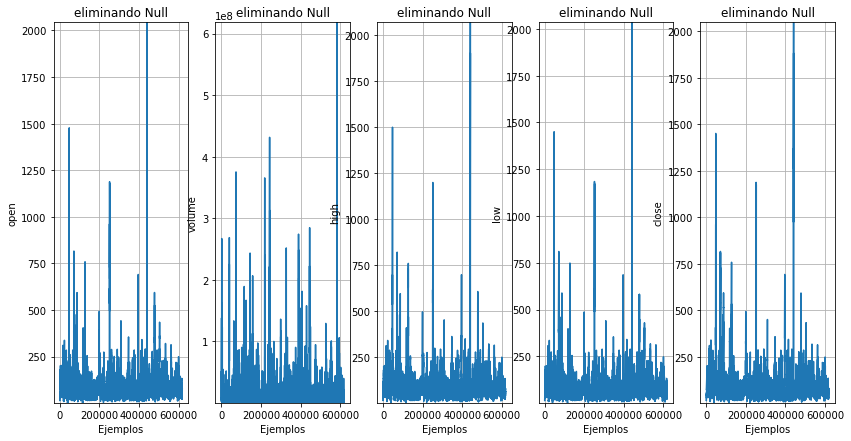

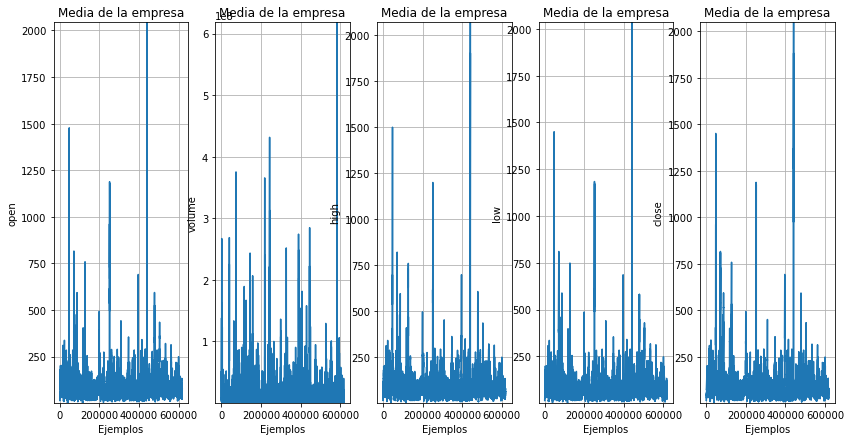

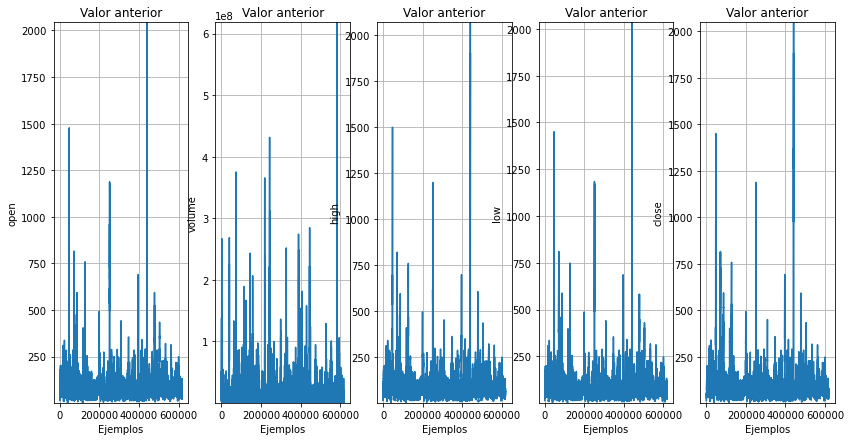

In [34]:
#vemos como están distribuidos los datos según sus valores en los datsets seleccionados
dataframes=(dataset_sin_nulls,dataset_media_empresa,dataset_valor_anterior)
titulos=("eliminando Null","Media de la empresa","Valor anterior")
for posicion, datos in enumerate(dataframes):
    resumenEntrada=datos.describe()
    plt.figure(figsize=(14,7))
    plt.subplot(151)
    plt.plot(datos['open'],label='open')
    plt.xlabel('Ejemplos')
    plt.ylabel('open')
    plt.ylim(resumenEntrada.loc[['min','max'],'open'])
    plt.title(titulos[posicion])
    plt.grid(True)#cuadriculado

    plt.subplot(152)
    plt.plot(datos['volume'])
    plt.xlabel('Ejemplos')
    plt.ylabel('volume')
    plt.ylim(resumenEntrada.loc[['min','max'],'volume'])
    plt.title(titulos[posicion])
    plt.grid(True)

    plt.subplot(153)
    plt.plot(datos['high'])
    plt.xlabel('Ejemplos')
    plt.ylabel('high')
    plt.ylim(resumenEntrada.loc[['min','max'],'high'])
    plt.title(titulos[posicion])
    plt.grid(True)

    plt.subplot(154)
    plt.plot(datos['low'])
    plt.xlabel('Ejemplos')
    plt.ylabel('low')
    plt.ylim(resumenEntrada.loc[['min','max'],'low'])
    plt.title(titulos[posicion])
    plt.grid(True)

    plt.subplot(155)
    plt.plot(datos['close'])
    plt.xlabel('Ejemplos')
    plt.ylabel('close')
    plt.ylim(resumenEntrada.loc[['min','max'],'close'])
    plt.title(titulos[posicion])
    plt.grid(True)

Como se podía esperar al haber tan pocos valores perdidos la distribución de los datos es prácticamente idéntica

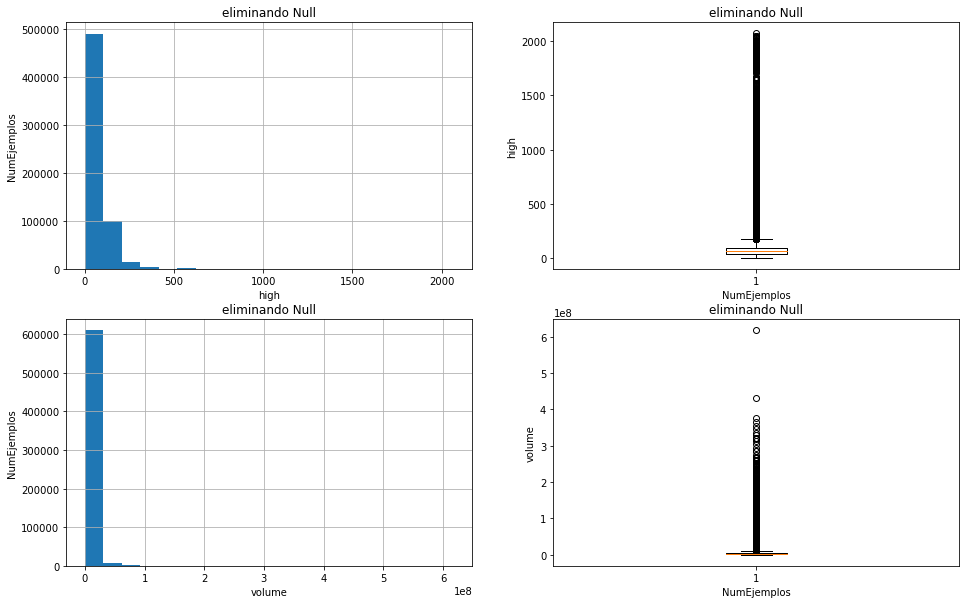

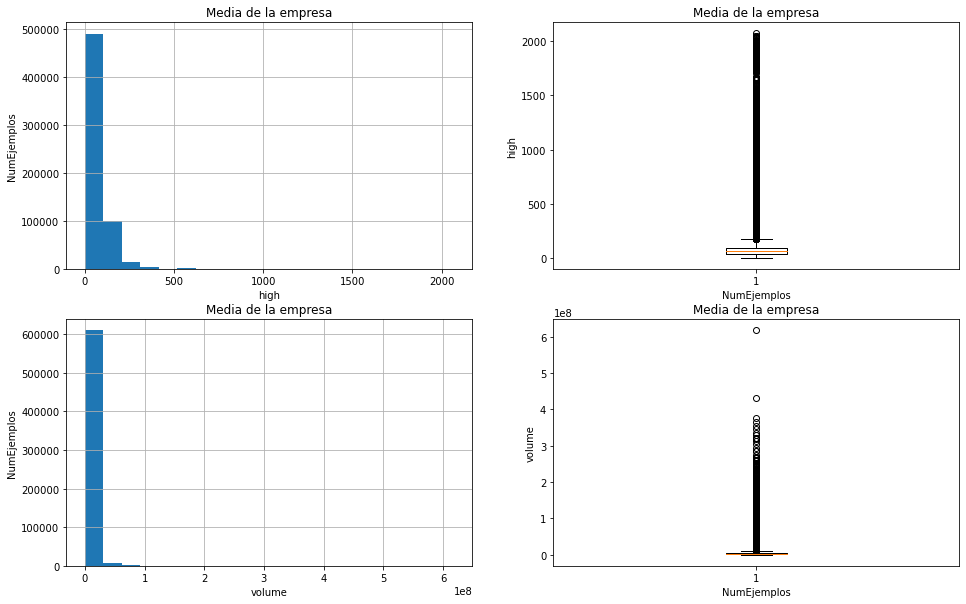

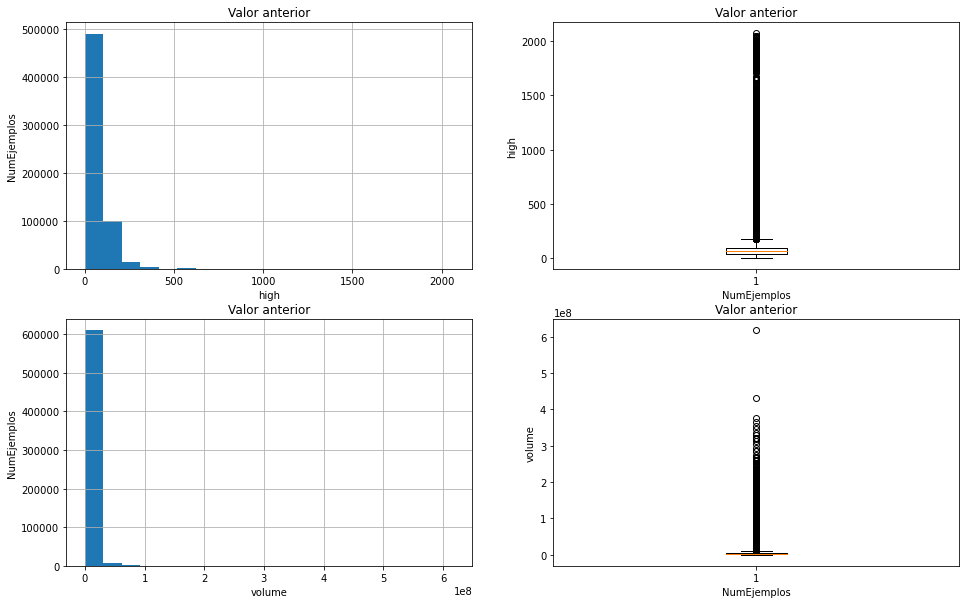

In [35]:
#veo los rangos de algunas variables
for posicion,datos in enumerate(dataframes):
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,(1))
    datos['high'].hist(bins=20)
    plt.xlabel('high')
    plt.ylabel('NumEjemplos')
    plt.title(titulos[posicion])
    plt.subplot(2,2,(2))
    plt.boxplot(datos['high'])
    plt.ylabel('high')
    plt.xlabel('NumEjemplos')
    plt.title(titulos[posicion])
    plt.subplot(2,2,(3))
    datos['volume'].hist(bins=20)
    plt.xlabel('volume')
    plt.ylabel('NumEjemplos')
    plt.title(titulos[posicion])
    plt.subplot(2,2,(4))
    plt.boxplot(datos['volume'])
    plt.ylabel('volume')
    plt.xlabel('NumEjemplos')
    plt.title(titulos[posicion])

Al igual que en el apartado anterior al haber tan poca diferencia entre los dataframes, las gráficas son similares. Si que se puede apreciar que los datos se encuentran la mayoría en un rango muy similar por lo que podemos deducir que están en las mismas unidades de medida

In [36]:
def regresion_polinomial(X_train, X_test, y_train, y_test, p_degree,nombre):
    # Creamos una Pipeline en la que generamos variables polinómicas de grado 2, estandarizamos los datos y aprendemos una regresión lineal
    pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=p_degree)),('scaler', StandardScaler()),('regressor', LinearRegression())])
    # Entrenamos la Pipeline
    pipePolinomial.fit(X_train, y_train)
    # Obtenemos el rendimiento en entrenamiento y en test (MSE)
    prTrain = pipePolinomial.predict(X_train)
    errorTrain = mean_squared_error(y_train, prTrain)
    prTest = pipePolinomial.predict(X_test)
    errorTest = mean_squared_error(y_test, prTest)
    plt.gcf().set_size_inches(15, 5, forward=True)
    real=plt.plot(np.arange(len(y_test)),y_test,c="blue", label='Resultados reales')
    pred=plt.plot(np.arange(len(y_test)),prTest,c="red", label='Resultados reales')
    plt.xlabel("Numero de ejemplo")
    plt.ylabel("Valor de cierre")
    plt.title(nombre)
    plt.legend(['Real', 'Predicted'])
    plt.show()
    print('El error en entrenamiento con el dataset  es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))


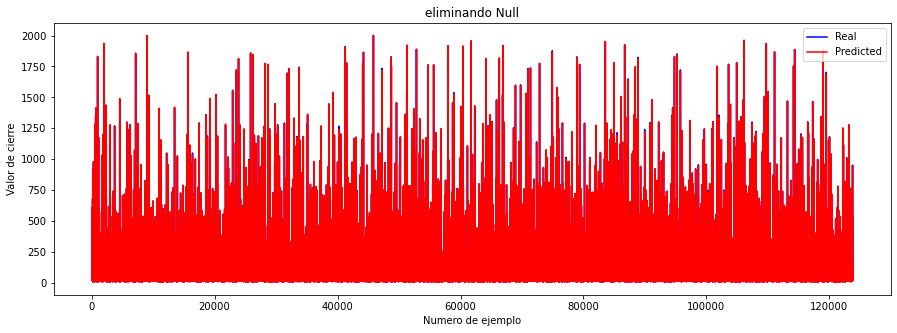

El error en entrenamiento con el dataset  es 0.4648 y en test es 0.4909


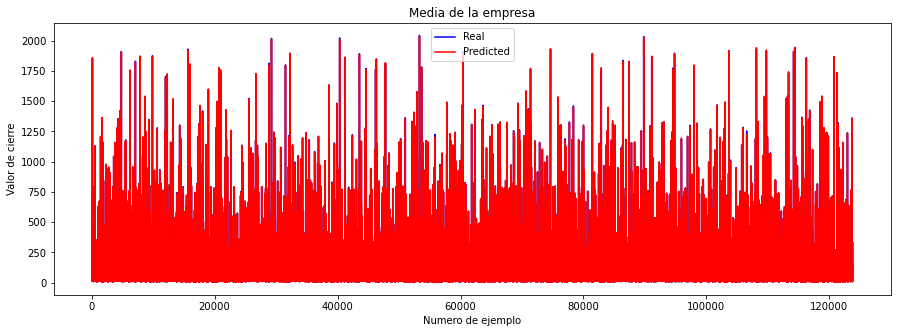

El error en entrenamiento con el dataset  es 0.5129 y en test es 0.4783


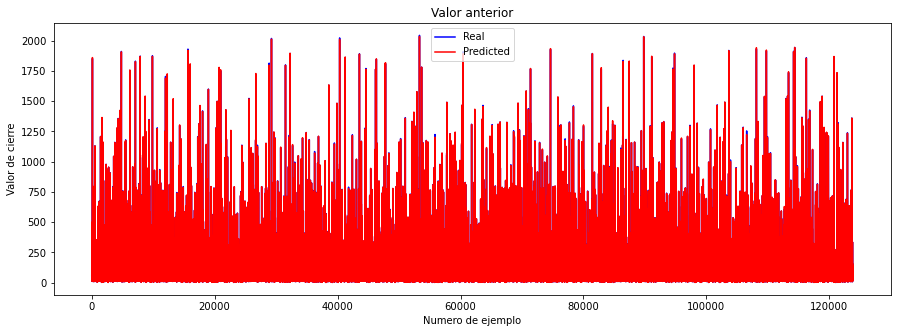

El error en entrenamiento con el dataset  es 0.4710 y en test es 0.4776


In [37]:
#utilizamos regresión polinomial para comprobar cuál de los dataframes obtiene mejores resultados mediante el error cuadrático medio
for posicion,datos in enumerate(dataframes):
    atSalida = 'close'
    atEntrada = ['Dia','Mes','Año','volume','open','high','low']
    datos_aux=datos.copy()
    dataset_output = datos_aux[atSalida].copy()
    #datos_aux.drop(atSalida, axis=1, inplace=True)
    datos_aux = datos_aux[atEntrada].copy()
    X_train, X_test, y_train, y_test = train_test_split(datos_aux, dataset_output, test_size=0.2, random_state=12)
    regresion_polinomial(X_train, X_test, y_train, y_test,2,titulos[posicion])
    
    
    

Como se ha podido observar con el resultado en test el dataframe que obtiene mejores resultados es en el que se ha imputado mediante el valor anterior. Así este será el que utilicemos para la resolución del problema

# Detección de outliers

In [38]:
#detectar outliers mediante el índice IQR
def deteccionOutliers_IQR(Dataframe,k=1.5):
    IQR=Dataframe.describe().loc['75%',:]-Dataframe.describe().loc['25%',:]
    superiores=Dataframe>Dataframe.describe().loc['75%',:]+k*IQR
    inferiores=Dataframe<Dataframe.describe().loc['25%',:]-k*IQR
    resultado=np.logical_or(superiores,inferiores)
    return resultado.any(axis=1)

In [39]:
#detectar outliers mediante la media y desviación
def deteccionOutliers_MeanStd(Dataframe,k=2):
    superiores=Dataframe>Dataframe.describe().loc['mean',:]+k*Dataframe.describe().loc['std',:]
    inferiores=Dataframe<Dataframe.describe().loc['mean',:]-k*Dataframe.describe().loc['std',:]
    resultado=np.logical_or(superiores,inferiores)
    return resultado.any(axis=1)

In [40]:
#obtengo datasets sin outliers según método de IQR y método de la desviación
dataset_sin_outDesviacion=dataset_valor_anterior.copy()
outliers_ms=deteccionOutliers_MeanStd(dataset_sin_outDesviacion.iloc[:,1:10])
dataset_sin_outDesviacion=dataset_sin_outDesviacion[(np.logical_not(deteccionOutliers_MeanStd(dataset_sin_outDesviacion.iloc[:,1:10],3)))]

dataset_sin_outIQR=dataset_valor_anterior.copy()
outliers_IQR=deteccionOutliers_IQR(dataset_sin_outIQR.iloc[:,1:10])
dataset_sin_outIQR=dataset_sin_outIQR[(np.logical_not(deteccionOutliers_IQR(dataset_sin_outIQR.iloc[:,1:10],3)))]

Ahora comprobaremos los resultados de la eliminación de outliers

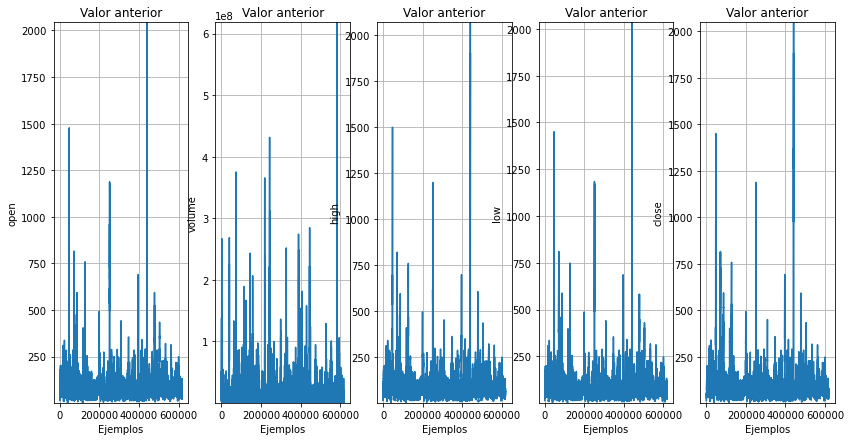

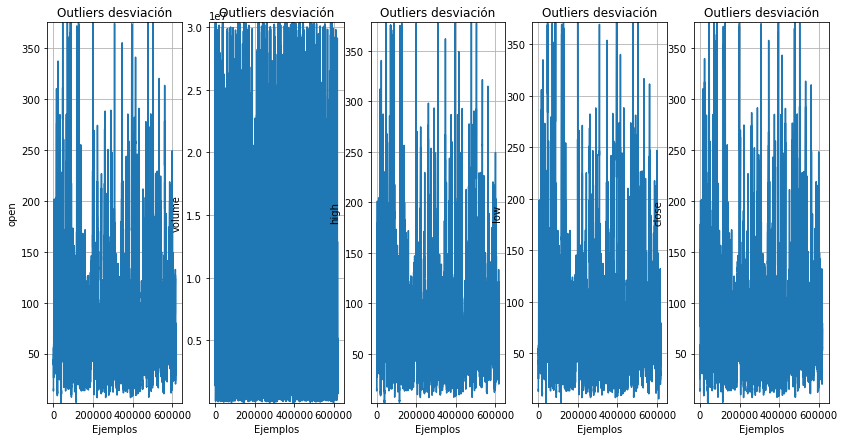

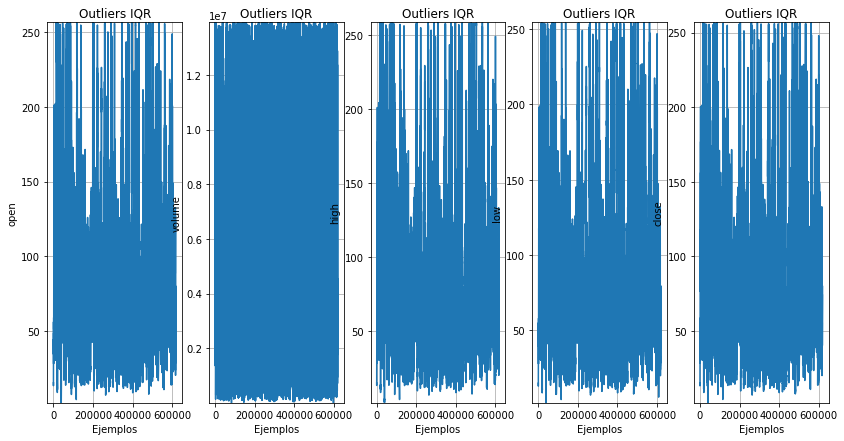

In [41]:
#vemos como están distribuidos los datos según sus valores en los datsets seleccionados
dataframes=(dataset_valor_anterior,dataset_sin_outDesviacion,dataset_sin_outIQR)
titulos=("Valor anterior","Outliers desviación","Outliers IQR")
for posicion, datos in enumerate(dataframes):
    resumenEntrada=datos.describe()
    plt.figure(figsize=(14,7))
    plt.subplot(151)
    plt.plot(datos['open'],label='open')
    plt.xlabel('Ejemplos')
    plt.ylabel('open')
    plt.ylim(resumenEntrada.loc[['min','max'],'open'])
    plt.title(titulos[posicion])
    plt.grid(True)#cuadriculado

    plt.subplot(152)
    plt.plot(datos['volume'])
    plt.xlabel('Ejemplos')
    plt.ylabel('volume')
    plt.ylim(resumenEntrada.loc[['min','max'],'volume'])
    plt.title(titulos[posicion])
    plt.grid(True)

    plt.subplot(153)
    plt.plot(datos['high'])
    plt.xlabel('Ejemplos')
    plt.ylabel('high')
    plt.ylim(resumenEntrada.loc[['min','max'],'high'])
    plt.title(titulos[posicion])
    plt.grid(True)

    plt.subplot(154)
    plt.plot(datos['low'])
    plt.xlabel('Ejemplos')
    plt.ylabel('low')
    plt.ylim(resumenEntrada.loc[['min','max'],'low'])
    plt.title(titulos[posicion])
    plt.grid(True)

    plt.subplot(155)
    plt.plot(datos['close'])
    plt.xlabel('Ejemplos')
    plt.ylabel('close')
    plt.ylim(resumenEntrada.loc[['min','max'],'close'])
    plt.title(titulos[posicion])
    plt.grid(True)

Como se puede apreciar al usar la detección de outliers el range de los valores no varía tanto.

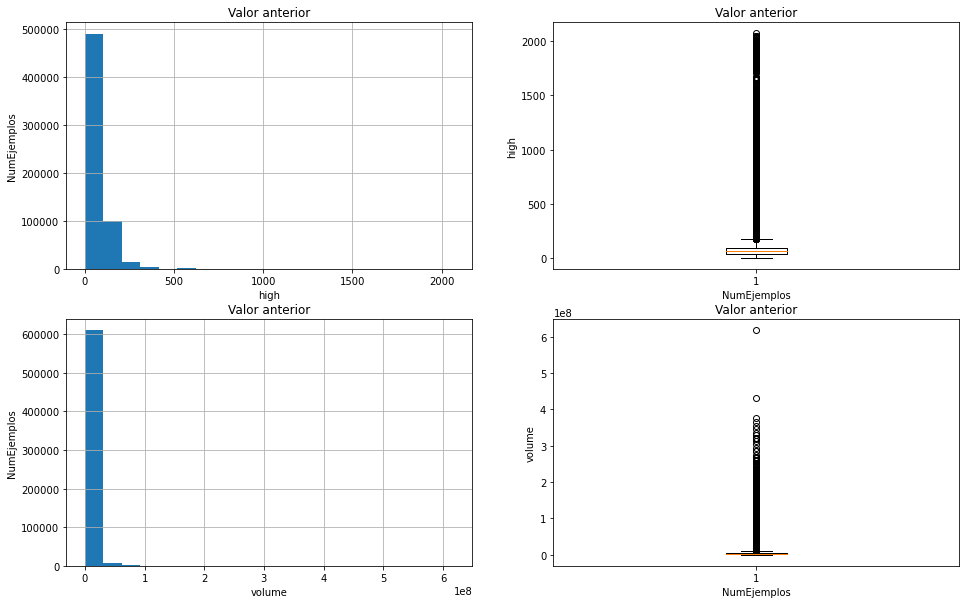

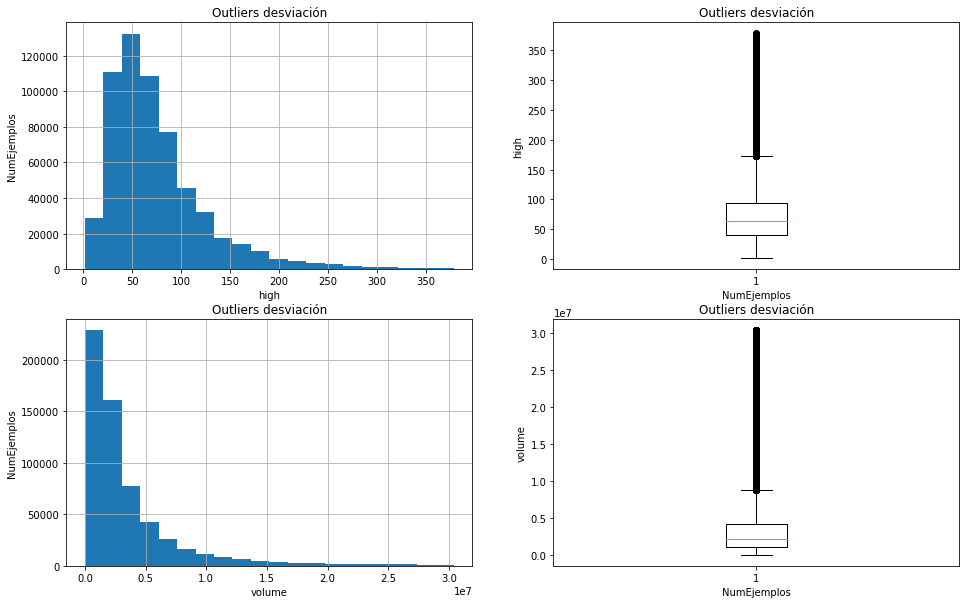

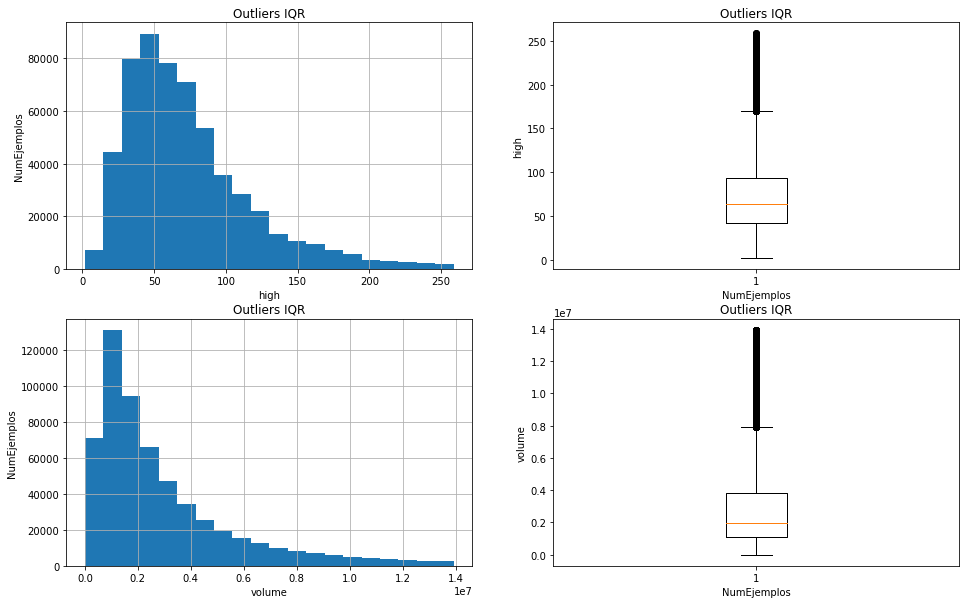

In [42]:
#veo los rangos de algunas variables
for posicion,datos in enumerate(dataframes):
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,(1))
    datos['high'].hist(bins=20)
    plt.xlabel('high')
    plt.ylabel('NumEjemplos')
    plt.title(titulos[posicion])
    plt.subplot(2,2,(2))
    plt.boxplot(datos['high'])
    plt.ylabel('high')
    plt.xlabel('NumEjemplos')
    plt.title(titulos[posicion])
    plt.subplot(2,2,(3))
    datos['volume'].hist(bins=20)
    plt.xlabel('volume')
    plt.ylabel('NumEjemplos')
    plt.title(titulos[posicion])
    plt.subplot(2,2,(4))
    plt.boxplot(datos['volume'])
    plt.ylabel('volume')
    plt.xlabel('NumEjemplos')
    plt.title(titulos[posicion])

Como hemos mencionado ejemplos ahora están acotados en un rango mucho menor.

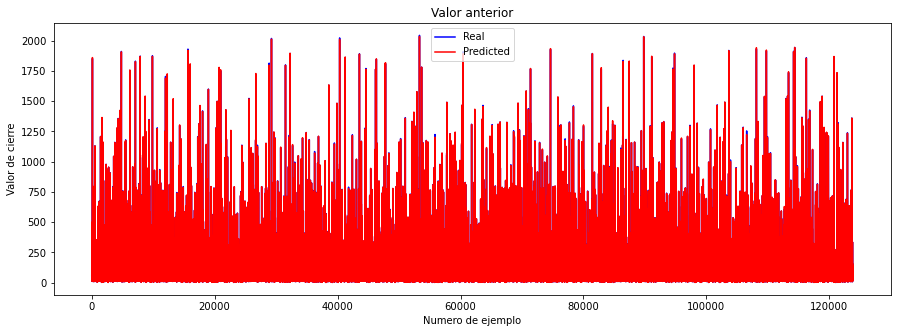

El error en entrenamiento con el dataset  es 0.4710 y en test es 0.4776


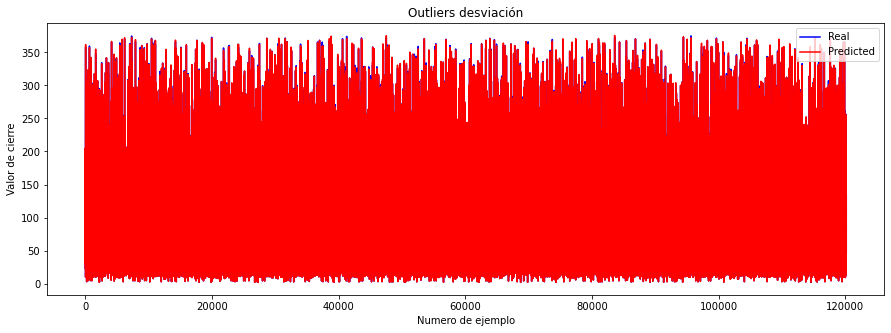

El error en entrenamiento con el dataset  es 0.2596 y en test es 0.2608


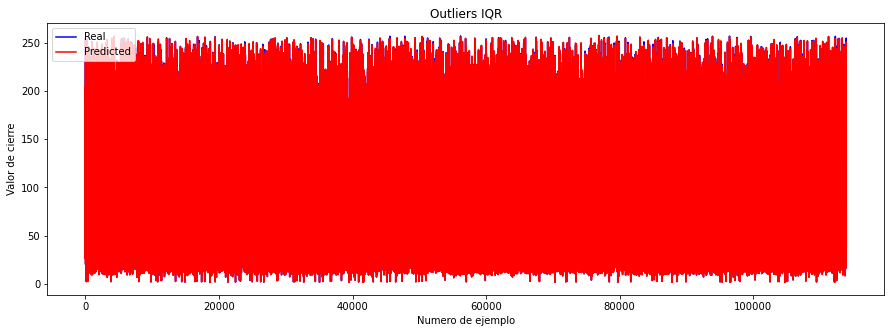

El error en entrenamiento con el dataset  es 0.2194 y en test es 0.2199


In [43]:
#utilizamos regresión polinomial para comprobar cuál de los dataframes obtiene mejores resultados mediante el error cuadrático medio
for posicion,datos in enumerate(dataframes):
    atSalida = 'close'
    atEntrada = ['open','high','low','volume','Dia','Mes','Año']
    datos_aux=datos.copy()
    dataset_output = datos_aux[atSalida].copy()
    datos_aux.drop(atSalida, axis=1, inplace=True)
    datos_aux = datos_aux[atEntrada].copy()
    X_train, X_test, y_train, y_test = train_test_split(datos_aux, dataset_output, test_size=0.2, random_state=12)
    regresion_polinomial(X_train, X_test, y_train, y_test,2,titulos[posicion])

Como hemos podido observar en las gráficas y confirmar mediante la regresión polinomial los mejores resultados en test se obtienen mediante la detección de outliers por el índice IQR.

<img src="grafica.png"/>

Sin embargo,dado que hay empresas con valores muy superiores al resto al eliminar los outliers perderíamos los datos de esas empresas. Si lo hiciéramos empresa por empresa también perderíamos los datos de peor rendimiento y mejor rendimiento de la empresa. Si imaginamos que tenemos una empresa que sigue una proyección similar a la de la gráfica, al hacer eliminación de outliers los picos mínimos y máximos desaparecerían. Si hubiéramos tenido más tiempo podríamos haber analizado los datos de forma más exhaustiva y eliminar los outliers necesarios.

Dicho esto, seguiremos utilizando el dataset con outliers ya que al hacer outliers perdemos demasiada información.

# Nuevas variables

In [44]:
dataset_valor_anterior=sustituirValorAnterior(dataset,indicesNulls)#eliminar

Añadiremos nuevas variables

In [45]:
def modificarEstacion(mes):
    if 9<=mes<=11:
        return 4
    elif 3<=mes<=5:
        return 2
    elif 6<=mes<=8:
        return 3
    else:
        return 1

In [46]:
def modificarNombreDia(dia):
    if dia=='Monday':
        return 1
    elif dia=='Tuesday':
        return 2
    elif dia=='Wednesday':
        return 3
    elif dia=='Thursday':
        return 4
    else:
        return 5


In [47]:
#genero nuevas variables
dataset_valor_anterior['diferencia_maxmin'] = dataset_valor_anterior.high - dataset_valor_anterior.low
dataset_valor_anterior['MejoraDia'] = dataset_valor_anterior.close - dataset_valor_anterior.open
dataset_valor_anterior['nombreDia'] = dataset_valor_anterior.date.dt.day_name()
dataset_valor_anterior['estacion']=dataset_valor_anterior['Mes'].apply(modificarEstacion)
dataset_valor_anterior['porcentajeMejora1dia']=((dataset_valor_anterior.close *100)/dataset_valor_anterior.open)-100
dataset_valor_anterior['nombreDia']=dataset_valor_anterior['nombreDia'].apply(modificarNombreDia)

Aquí muestro las empresas cuyas acciones más se han revalorizado en 1 día.

In [48]:
mejora_1_dia=dataset_valor_anterior.groupby(['Name']).MejoraDia.max().sort_values(ascending=False)
mejora_1_dia=mejora_1_dia.iloc[0:10]
print(mejora_1_dia)

Name
AMZN     81.38
PCLN     58.65
GOOG     53.42
GOOGL    50.45
HUM      36.03
CMG      34.92
REGN     33.07
PRGO     30.30
AZO      27.72
BIIB     27.23
Name: MejoraDia, dtype: float64


Como es lógico las empresas cuyo valor de acciones más ha aumentado en un día son las que generalmente tienen un alto valor. Si viésemos las que más han aumentado su porcentaje de valor tal vez serían empresas más pequeñas las que apareciesen. Esto se ve en la columna de porcentajeMejora1dia

In [49]:
porcentaje_mejora_1_dia=dataset_valor_anterior.groupby(['Name']).porcentajeMejora1dia.max().sort_values(ascending=False)
porcentaje_mejora_1_dia=porcentaje_mejora_1_dia.iloc[0:10]
print(porcentaje_mejora_1_dia)

Name
UA      152.184466
CHD      80.580714
WMB      36.289121
CHK      29.770992
AMD      25.078370
HUM      20.171313
HOG      19.467078
RRC      18.479745
PRGO     18.397086
HPQ      18.078021
Name: porcentajeMejora1dia, dtype: float64


Como se puede ver las que más porcentaje de su valor aumentan en un día son empresas de menor tamaño ya un pequeño aumento de su valor será un mayor porcentaje que el mismo aumento en una empresa más grande.

In [50]:
variacionDia=dataset_valor_anterior.groupby(['Name']).diferencia_maxmin.max().sort_values(ascending=False)
variacionDia=variacionDia.iloc[0:10]
print(variacionDia)

Name
AMZN     138.260
PCLN     109.900
CMG       80.500
AZO       59.695
GOOG      58.570
GOOGL     58.250
REGN      56.905
PRGO      51.098
HUM       43.385
ULTA      43.220
Name: diferencia_maxmin, dtype: float64


Aquí vemos las empresas con mayor variación del precio de sus acciones en un día.

# EXplicacion2

In [51]:
dataset_valor_anterior=dataset_valor_anterior.drop(['porcentajeMejora1dia','diferencia_maxmin','MejoraDia'],axis=1)

In [52]:
dataset_valor_anterior

,date,open,high,low,close,volume,Name,Dia,Mes,Año,nombreDia,estacion
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL,8,2,2013,5,1
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL,11,2,2013,1,1
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL,12,2,2013,2,1
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL,13,2,2013,3,1
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL,14,2,2013,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259.0,ZTS,1,2,2018,4,1
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187.0,ZTS,2,2,2018,5,1
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031.0,ZTS,5,2,2018,1,1
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323.0,ZTS,6,2,2018,2,1


<image src="grafica.jpg" width="50" height="50"/>

# Distribución normal

Haremos que los datos sigan una distribución normal ya que así se obtienen mejores resultados en muchos modelos de evaluación, ya que muchos de ellos asumen una distribución normal en los datos.

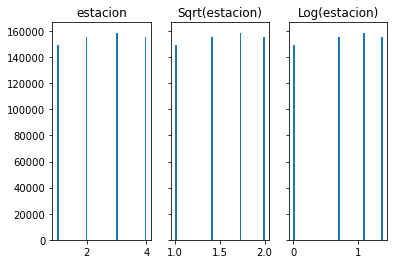

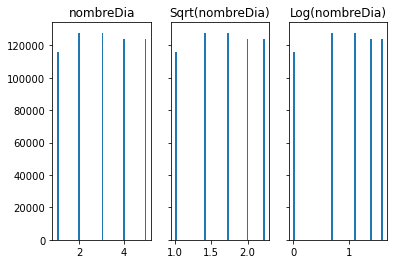

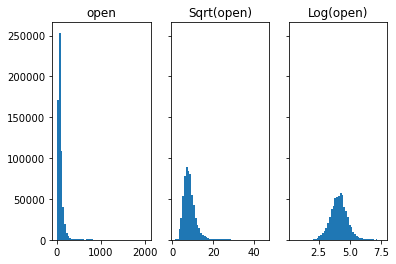

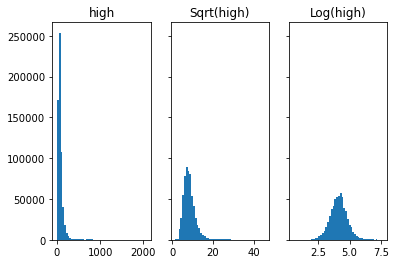

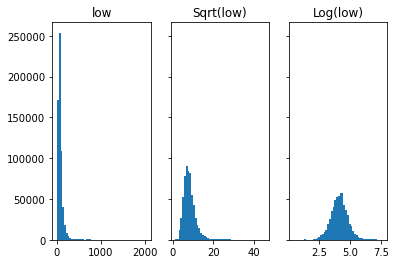

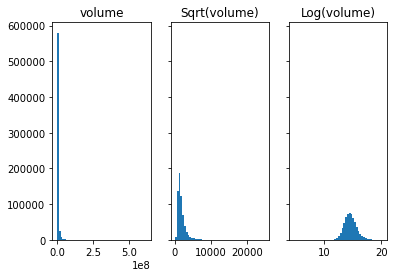

In [53]:
nombreColumnas = ['Name','date','Dia','Mes','Año','estacion','nombreDia' ,'open', 'high', 'low','volume']
for valor in(nombreColumnas[5:len(nombreColumnas)]):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(6,4))
    ax1.hist(dataset_valor_anterior[valor], bins=50)
    ax1.set_title(valor)
    ax2.hist(np.sqrt(dataset_valor_anterior[valor]), bins=50)
    ax2.set_title('Sqrt({})'.format(valor))
    ax3.hist(np.log(dataset_valor_anterior[valor]), bins=50)
    ax3.set_title('Log({})'.format(valor));

Ahora veremos si haciuendo que los datos sigan una distribución normal se mejoran los resultados

In [54]:
#creamos los dataframes pasando a distribución normal
dataset_log=dataset_valor_anterior.copy()
dataset_raiz=dataset_valor_anterior.copy()
dataset_log[nombreColumnas[5:len(nombreColumnas)]]=np.log(dataset_log[nombreColumnas[5:len(nombreColumnas)]])
dataset_raiz[nombreColumnas[5:len(nombreColumnas)]]=np.sqrt(dataset_raiz[nombreColumnas[5:len(nombreColumnas)]])

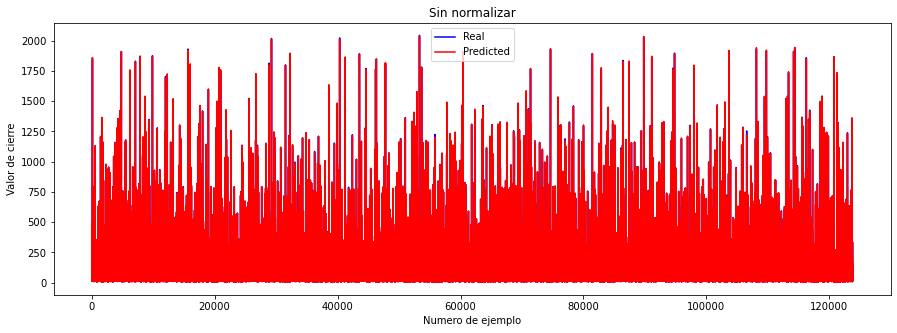

El error en entrenamiento con el dataset  es 0.4698 y en test es 0.4760


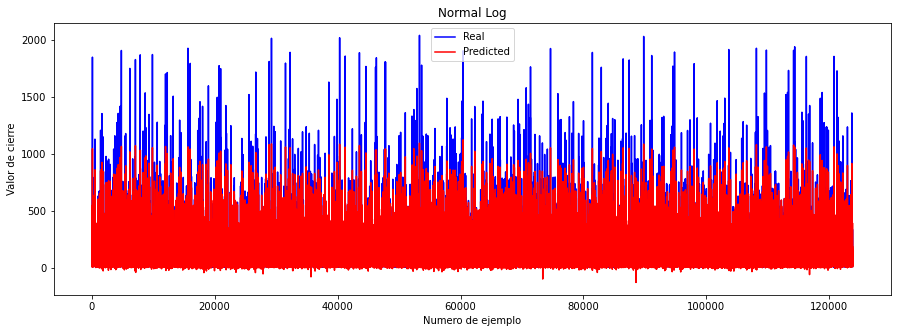

El error en entrenamiento con el dataset  es 1017.1496 y en test es 1048.5487


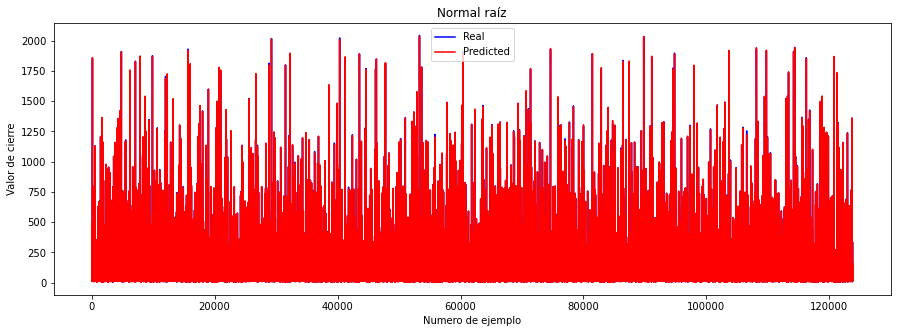

El error en entrenamiento con el dataset  es 0.4707 y en test es 0.4757


In [55]:
#utilizamos regresión polinomial para comprobar cuál de los dataframes obtiene mejores resultados mediante el error cuadrático medio
dataframes=(dataset_valor_anterior,dataset_log,dataset_raiz)
titulos=("Sin normalizar","Normal Log","Normal raíz")
for posicion,datos in enumerate(dataframes):
    atSalida = 'close'
    atEntrada = nombreColumnas[2:len(nombreColumnas)]
    datos_aux=datos.copy()
    dataset_output = datos_aux[atSalida].copy()
    datos_aux.drop(atSalida, axis=1, inplace=True)
    datos_aux = datos_aux[atEntrada].copy()
    X_train, X_test, y_train, y_test = train_test_split(datos_aux, dataset_output, test_size=0.2, random_state=12)
    regresion_polinomial(X_train, X_test, y_train, y_test,2,titulos[posicion])

# explicacion

Añadiremos nuevas variables

# 3.3 Transformación de variables numéricas a categóricas

No se va a realizar dicho tipo de transformación , pues para el proyecto se realizará principalmente redes neuronales y regresión polinomial.

In [56]:
# explicacion

# 3.4 Reducción de datos

# Obtención del rendimiento con todas las variables

Para comprobar la calidad de las técnicas de selección de variables, se va a calcular el rendimiento de una regresión polinomial  si utilizamos todas las variables. Nos hemos decidido por esta técnica, pues es fácil de implementar.

Se aplicará el método hold-out para obtener los conjuntos de entrenamiento y de test (70% de datos para entrenar).



## Análisis de correlaciones

In [57]:
import matplotlib.pyplot as plt
correlaciones = dataset_raiz.corr(method ='pearson')
correlaciones

,open,high,low,close,volume,Dia,Mes,Año,nombreDia,estacion
open,1.000000,0.999931,0.999921,0.925304,-0.339895,0.002275,0.014800,0.148070,0.001121,-0.001402
high,0.999931,1.000000,0.999890,0.925430,-0.338680,0.002032,0.014509,0.148115,0.001296,-0.001799
low,0.999921,0.999890,1.000000,0.925254,-0.341382,0.002553,0.015184,0.147977,0.001106,-0.000904
close,0.925304,0.925430,0.925254,1.000000,-0.230802,0.001516,0.011137,0.116497,0.001097,-0.000801
volume,-0.339895,-0.338680,-0.341382,-0.230802,1.000000,-0.008845,-0.033628,0.001492,0.019332,-0.025838
Dia,0.002275,0.002032,0.002553,0.001516,-0.008845,1.000000,-0.002761,-0.010008,0.000645,0.012920
Mes,0.014800,0.014509,0.015184,0.011137,-0.033628,-0.002761,1.000000,-0.113705,-0.016810,0.536850
Año,0.148070,0.148115,0.147977,0.116497,0.001492,-0.010008,-0.113705,1.000000,0.011348,-0.100269
nombreDia,0.001121,0.001296,0.001106,0.001097,0.019332,0.000645,-0.016810,0.011348,1.000000,-0.016974
estacion,-0.001402,-0.001799,-0.000904,-0.000801,-0.025838,0.012920,0.536850,-0.100269,-0.016974,1.000000


In [58]:
explicacion

NameError: name 'explicacion' is not defined

In [ ]:
# Mostramos la matriz de correlaciones especificando el rango de los valores [-1, 1]
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
cax = ax.matshow(correlaciones, vmin=-1, vmax=1, cmap=plt.cm.rainbow)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset_raiz.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# Añadimos los nombres de las variables en la figura
names = dataset_raiz.columns
ax.set_xticklabels(names, rotation='90')
ax.set_yticklabels(names)
plt.show()

In [ ]:
explicacion

Tras la obtención de matriz de correlaciones, se puede determinar que las variables de entrada están relacionadas entre si de manera muy alta, salvo el volumen.

Veamos ahora el rendimiento que se obtendría al eliminar una de éstas variables. Para hacer más completo el experimento, se procederá a crear 3 datasets distintos: cada uno eliminando una variable distinta.

*Eliminación* *de* *open*, *high*, *low* por separado

Tras los experimentos realizados, se puede observar que se obtiene un peor resultado al tratar de eliminar cualquiera de las tres variables que cuentan con una mayor correlación -casi perfecta- .

Por otro lado, en caso de eliminar una variable,la que menos impacto tiene en el rendimiento del modelo es 'open', y la que más influye es 'high'. 

En caso de eliminar dos variables,el mayor impacto negativo en el rendimiento vendrá dado por la eliminación de conjunta de 'low' y 'high'. Cosa que es natural, pues representa el valor más bajo y más alto de las acciones de una empresa en un día.

La eliminación de 'high', 'low' y 'open' provoca un desenlace nefasto y esperado, pues predecir el valor al final del día de las acciones a partir del volumen de acciones negociadas es sumamente complicado 

In [59]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [71]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

from sklearn import metrics, neighbors, tree, preprocessing
from scipy import stats

from matplotlib.colors import ListedColormap

from shutil import copyfile

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import neighbors, model_selection, tree
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

# Se importa la librería de selección de variables
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA

Seleccion de variables
Utilizaremos diferentes tecnicas de seleccion de variables, compararemos sus errores y eligiremos la mejor.

Correlación mutua: función f_regression
Información mutua: función mutual_info_regression
Una vez conocida la calidad de cada variable se deben escoger las mejores. Para ello vimos en las clases teóricas que había varias opciones. La librería Scikit-learn ofrece dos de estas técnicas en forma de clases (con sus campos y sus métodos):

Elegir las k mejores con la clase SelectKBest
Elegir las variables en base al percentil (el % de las variables) con la clase SelectPercentile
Correlación mutua: función [f_regression]

In [61]:

# Se crea la Pipeline con las fases deseadas de Correlación mutua
pipe_f_regression = Pipeline([
    ('correlacion_mutua', feature_selection.SelectPercentile(feature_selection.f_regression)),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())])
# Se crea el grid de híper-parámetros
parameters_f_regression = {'correlacion_mutua__percentile': [10, 20, 30]}

Información mutua: función [mutual_info_regression]

In [62]:

# Se crea la Pipeline con las fases deseadas de Informacion mutua
pipe_mutual_info_regression = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('informacion_mutua', feature_selection.SelectPercentile(feature_selection.mutual_info_regression,percentile=10)),
    ('regressor', LinearRegression())])
# Se crea el grid de híper-parámetros
parameters_mutual_info_regression = {'informacion_mutua__percentile': [10, 20, 30]}

In [63]:
atSalida = 'close'
atEntrada = ['open','high','low','volume','Dia','Mes','Año','estacion','nombreDia']
dataset_aapl = dataset_raiz[dataset_raiz['Name']=='AAPL'].copy()
dataset_output = dataset_aapl[atSalida].copy()
dataset_aapl.drop(atSalida, axis=1, inplace=True)
dataset_aapl = dataset_aapl[atEntrada].copy()


X_train, X_test, y_train, y_test = train_test_split(dataset_aapl, dataset_output, test_size=0.2, random_state=12)

In [64]:
# Selecciona la pipe a utilizar
pipe = pipe_f_regression
parameters = parameters_f_regression

# Se llama al constructor de GridSearchCV para que genere todas las combinaciones de los híper-parámetros definidos anteriormente
gridSearch_pipe = model_selection.GridSearchCV(pipe,parameters,cv=3,return_train_score=True)
# Se realiza el aprendizaje de todos los clasificadores considerados (todas las configuraciones)
gridSearch_pipe = gridSearch_pipe.fit(X_train,y_train.values.ravel())
# Se muestra la mejor configuración junto con su rendimiento
print(gridSearch_pipe.best_score_)
print(gridSearch_pipe.best_params_)


# Almacenamos el DataFrame con los resultados
diccionarioResultados = gridSearch_pipe.cv_results_

# Se imprime el mejor porcentaje de acierto y los resultados de todas las configuraciones
print(gridSearch_pipe.best_score_,gridSearch_pipe.best_params_)

# Se obtiene el rendimiento en entrenamiento y test por la mejor configuración
accTrain = gridSearch_pipe.score(X_train,y_train.values.ravel())*100
accTest = gridSearch_pipe.score(X_test,y_test.values.ravel())*100
print('Resultado en entrenamiento: {}%'.format(accTrain))
print('Resultado en test: {}%'.format(accTest))

0.9996932557097563
{'correlacion_mutua__percentile': 30}
0.9996932557097563 {'correlacion_mutua__percentile': 30}
Resultado en entrenamiento: 99.97152803712179%
Resultado en test: 99.96494921892443%


In [65]:
# Selecciona la pipe a utilizar
pipe = pipe_mutual_info_regression
parameters = parameters_mutual_info_regression

# Se llama al constructor de GridSearchCV para que genere todas las combinaciones de los híper-parámetros definidos anteriormente
gridSearch_pipe = model_selection.GridSearchCV(pipe,parameters,cv=3,return_train_score=True)
# Se realiza el aprendizaje de todos los clasificadores considerados (todas las configuraciones)
gridSearch_pipe = gridSearch_pipe.fit(X_train,y_train.values.ravel())
# Se muestra la mejor configuración junto con su rendimiento
print(gridSearch_pipe.best_score_)
print(gridSearch_pipe.best_params_)


# Almacenamos el DataFrame con los resultados
diccionarioResultados = gridSearch_pipe.cv_results_

# Se imprime el mejor porcentaje de acierto y los resultados de todas las configuraciones
print(gridSearch_pipe.best_score_,gridSearch_pipe.best_params_)

# Se obtiene el rendimiento en entrenamiento y test por la mejor configuración
accTrain = gridSearch_pipe.score(X_train,y_train.values.ravel())*100
accTest = gridSearch_pipe.score(X_test,y_test.values.ravel())*100
print('Resultado en entrenamiento: {}%'.format(accTrain))
print('Resultado en test: {}%'.format(accTest))

0.9996928466296334
{'informacion_mutua__percentile': 20}
0.9996928466296334 {'informacion_mutua__percentile': 20}
Resultado en entrenamiento: 99.97088079470792%
Resultado en test: 99.96697305117243%


In [66]:
explicacion

NameError: name 'explicacion' is not defined

PCA

In [ ]:
# Se crea la Pipeline con las fases deseadas para el pipe PCA
pipe_pca = Pipeline([('pca', PCA(svd_solver='full')),
                 ('polynomial', PolynomialFeatures(degree=2)),
                 ('scaler', StandardScaler()),
                 ('regressor', LinearRegression())])
# Se crea el grid de híper-parámetros
parameters_pca = {'pca__n_components': [0.10, 0.30, 0.50, 0.70, 0.90]}
# Se llama al constructor de GridSearchCV para que genere todas las combinaciones de los híper-parámetros definidos anteriormente
gridSearch_pipe = model_selection.GridSearchCV(pipe_pca,parameters_pca,cv=10,n_jobs=-1,return_train_score=True)
# Se realiza el aprendizaje de todos los clasificadores considerados (todas las configuraciones)
gridSearch_pipe =  gridSearch_pipe.fit(X_train,y_train)
# Se muestra la mejor configuración junto con su rendimiento
print(gridSearch_pipe.best_score_)
print(gridSearch_pipe.best_params_)


# Almacenamos el DataFrame con los resultados
diccionarioResultados = gridSearch_pipe.cv_results_

# Se imprime el mejor porcentaje de acierto y los resultados de todas las configuraciones
print(gridSearch_pipe.best_score_,gridSearch_pipe.best_params_)

# Se obtiene el rendimiento en entrenamiento y test por la mejor configuración
accTrain = gridSearch_pipe.score(X_train,y_train.values.ravel())*100
accTest = gridSearch_pipe.score(X_test,y_test.values.ravel())*100
print('Resultado en entrenamiento: {}%'.format(accTrain))
print('Resultado en test: {}%'.format(accTest))

Seleccióndeinstancias

Utilizamos Wrapers ya que miran la precision con Leave One Out y no tiene en cuanta las clases, las cuales no nos importan ennuestro modelo de regresion

In [73]:
def RMHC(regresor, X, y, s=0.1, iteraciones=10000):
    """
     Algoritmo RMHC (Random Mutation Hill Climbing) para la selección de instancias.
      Se comienza con una selección aleatoria de s * nEjemplos instancias. Para cada iteración, se elige una instancia
      seleccionada y una no seleccionada para ser intercambiadas. Si el intercambio mejora la precisión (leave-one-out) sobre train
      se mantiene el cambio, sino se deshace
    :param X: Matriz con los ejemplos de entrenamiento (se asume que los ejemplos están normalizados)
    :param y: Vector con la salida de los ejemplos en X
    :param s: Porcentaje de instancias a ser seleccionadas (s es un valor entre 0 y 1)
    :param iteraciones: Número de iteraciones (intercambios) a probar
    :return: Vector con la máscara de instancias seleccionadas 
            (La posición S[i]=True indica que la instancia i ha sido seleccionada y False lo contrario)
    """
    print(X_train)
    # Como usamos aleatorios en RMHC establecemos la semilla para que el test sea correcto y siempre obtengamos el mismo resultado
    np.random.seed(12312)

    # En este caso vamos a mantener dos vectores de enteros con los índices de las instancias seleccionadas y no seleccionadas
    # Establecemos el número de instancias a seleccionar (es fijo)
    nSel = int(X.shape[0]*s)
    
    # Obtenemos una permutación aleatoria de todos los índices disponibles 
    # (un array de 0 a X.shape[0] con valores ordenados aleatoriamente): utilizad permutation de Numpy
    permute = np.random.permutation(X.shape[0])
    
    # Cogemos como seleccionadas las instancias correspondientes a los primeros nSel índices  y no seleccionadas el resto#     
    seleccionadas = permute[:nSel]
    noSeleccionadas = permute[nSel:]
    #print(seleccionadas)
    # Calculamos la preicisión con la selección inicial
    # Entrenamos regresor con las instancias seleccionadas
    regresor.fit(X[seleccionadas], y[seleccionadas])
    
    # Obtenemos las salidas con leaveOneOut (para no tener en cuenta las instancias seleccionadas como vecinos de sí mismas)
    salidas = regresor.predict(X)
        
    # Calculamos la precisión
    mse = metrics.mean_squared_error(salidas, y)

    # Comenzamos las iteraciones:
    #   En cada una, intercambiamos una instancia seleccionada con una que no lo está y comprobamos si mejora la precisión
    for i in range(0, iteraciones):
        # Seleccionamos un índice de manera aleatoria que nos indica la instancia a eliminar de las seleccionadas: randint de Numpy
        quitar = np.random.randint(seleccionadas.size)
        
        # Seleccionamos un índice de manera aleatoria que nos indica la instancia a añadir a las seleccionadas: randint de Numpy
        poner = np.random.randint(noSeleccionadas.size)
        
        # Guardamos el ejemplo eliminado
        aux =  seleccionadas[quitar]
        
        # Añadimos la nueva instancia seleccionada sustituyendo la que se elimina: intercambio en las listas de seleccionados y no seleccionados
        seleccionadas[quitar] = noSeleccionadas[poner]
        
        # Entrenamos de nuevo regresor
        regresor.fit(X[seleccionadas], y[seleccionadas])

        # Calculamos la precisión de la solución actual
        # Obtenemos las salidas con leaveOneOut (para no tener en cuenta las instancias seleccionadas como vecinos de sí mismas)
        salidas = regresor.predict(X)
        
        # Calculamos la precisión
        mseNew = metrics.mean_squared_error(salidas, y)

        # Si la precisión actual es peor que la anterior, devolvemos la instancia eliminada a las seleccionadas
        # Sino si la precisión de la solución actual es mejor o igual que la anterior, guardamos la precisión y
        #  añadimos la instancia eliminada a las no seleccionadas
        if mseNew <= mse:
            mse = mseNew
            noSeleccionadas[poner] = aux
        else:
            seleccionadas[quitar] = aux

        if i % 100 == 0:
            print("MSE en iteración {}: {}".format(i, mse))

    # A partir de las seleccionadas creamos la máscara de instancias seleccionadas 
    # donde True en la posición i indica que la instancia i es seleccionada
    S = np.zeros(len(y), bool)
    S[seleccionadas] = True

    return S

In [74]:
S = RMHC(Pipeline([('polynomial', PolynomialFeatures(degree=2)),('scaler', StandardScaler()),('regressor', LinearRegression())]), X_train.values, y_train.values)

           open       high        low        volume  Dia  Mes   Año  estacion  \
1367   7.805857   7.844100   7.784324   7350.769007   16    7  2013  1.732051   
2125   9.977976  10.000000   9.966945   4876.466344   19    7  2016  1.732051   
1416   8.408157   8.413168   8.347964   9518.558347   24    9  2013  2.000000   
1268   8.011148   8.032073   7.987484   9087.564195   22    2  2013  1.000000   
1393   8.481828   8.511751   8.461672   9154.765207   21    8  2013  1.732051   
...         ...        ...        ...           ...  ...  ...   ...       ...   
1677   9.971459  10.005998   9.936297   6488.003006    7   10  2014  2.000000   
1732  10.610372  10.616497  10.583478   3805.208404   24   12  2014  1.000000   
1308   7.489419   7.580046   7.476390  10360.420937   22    4  2013  1.414214   
1537   8.719925   8.752463   8.693181   7495.929429   19    3  2014  1.414214   
1691  10.239629  10.270346  10.232302   5847.024970   27   10  2014  2.000000   

      nombreDia  
1367   1.

In [75]:
X_train_fit=X_train[S]
y_train_fit=y_train[S]

# Comparativas de métodos

# LSTM

 La característica principal de las redes recurrentes es que la información puede persistir introduciendo bucles en el diagrama de la red, por lo que, básicamente, pueden «recordar» estados previos y utilizar esta información para decidir cuál será el siguiente.

De manera sencilla, pueden ser pensadas como múltiples copias de la misma red, cada una pasando un mensaje a su sucesor. Por lo que, gracias a su naturaleza, pueden ser relacionadas con listas o secuencias.

Las LSTM pueden aprender dependencias largas, por lo que se podría decir que tienen una «memoria» a más largo plazo. Lo que les hace atractivas para este tipo de problemas, donde la información pasada puede jugar un papel importante.

INSERTAR IMAGEN!!!!

In [76]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.  Downloading google_pasta-0.2.0-py3-none-any.whl (57 kB)



ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\USUARIO\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=a34a93a6989f666f3512f5a96e3a419dbfe65e3ab1ded77c1ed07d898a491819
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=0509944840118a200db7e4c5a841141071d269dfe704a5ebbc26d7a1eecaa5e1
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [79]:
#Importacion de librerias necesarias para la red neuronal
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

La comparativa del método se hará con la empresa AAl. Se ha probado a obtener el resultado de salida,mediante el uso únicamente de la variable 'close'. Se ha elegido un Epoch de 100 , que significará que el número de veces que se ejecutará forward propagation y backpropagation será de 100.

In [ ]:
df = dataset_raiz[dataset_raiz['Name']=='AAPL'].copy()

In [ ]:
df.head()

In [151]:
#Crear un conjunto de entrenamiento y de test (70% para train, 30% para test)
numero_ejemplos_entrenamiento = int(len(df)*0.7)
training_set = df.iloc[:numero_ejemplos_entrenamiento, 4:5].values
test_set = df.iloc[numero_ejemplos_entrenamiento:, 4:5].values

In [152]:
# Feature Scaling: estandarizacion para la red
sc = MinMaxScaler(feature_range = (0, 1))
#crear una estructura de datos con 60 time-steps y 1 salida
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [153]:
model = Sequential()#Agregar la primera capa y  Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Agregar la segunda capa y  Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Agregar la tercera capa y Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Agregar la cuarta capa y Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Agregar la capa de salida
model.add(Dense(units = 1))

# Compilar RNN: red neuronal recurrente
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting RNN con el Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 10s 95ms/step - loss: 0.1537
Epoch 2/100
24/24 [==============================] - 3s 104ms/step - loss: 0.0164
Epoch 3/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0087
Epoch 4/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0076
Epoch 5/100
24/24 [==============================] - 3s 104ms/step - loss: 0.0077
Epoch 6/100
24/24 [==============================] - 2s 104ms/step - loss: 0.0073
Epoch 7/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0078
Epoch 8/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0073 0s - loss
Epoch 9/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0074
Epoch 10/100
24/24 [==============================] - 2s 103ms/step - loss: 0.0078
Epoch 11/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0082
Epoch 12/100
24/24 [==============================] - 2s 104ms/step - loss: 0.0060
Epo

In [154]:
# Obtener las predicciones
dataset_train = df.iloc[:numero_ejemplos_entrenamiento, 1:2]
dataset_test = df.iloc[numero_ejemplos_entrenamiento:, 1:2]

In [155]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

In [156]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs= inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [157]:
tostore_test_result = []
for i in range(60,inputs.shape[0]):
    tostore_test_result.append(myinputs[i-60:i,0])
tostore_test_result = np.array(tostore_test_result)
tostore_test_result = np.reshape(tostore_test_result,(tostore_test_result.shape[0],tostore_test_result.shape[1],1))
myclosing_priceresult = model.predict(tostore_test_result)

In [158]:
prediccion_resultante = scalerdata.inverse_transform(myclosing_priceresult)

In [159]:
resultados_reales = df['close'].iloc[numero_ejemplos_entrenamiento:]
resultados_reales = np.array(resultados_reales).reshape(-1,1)

In [160]:
mean_squared_error(resultados_reales,prediccion_resultante)

1.4461697060073808

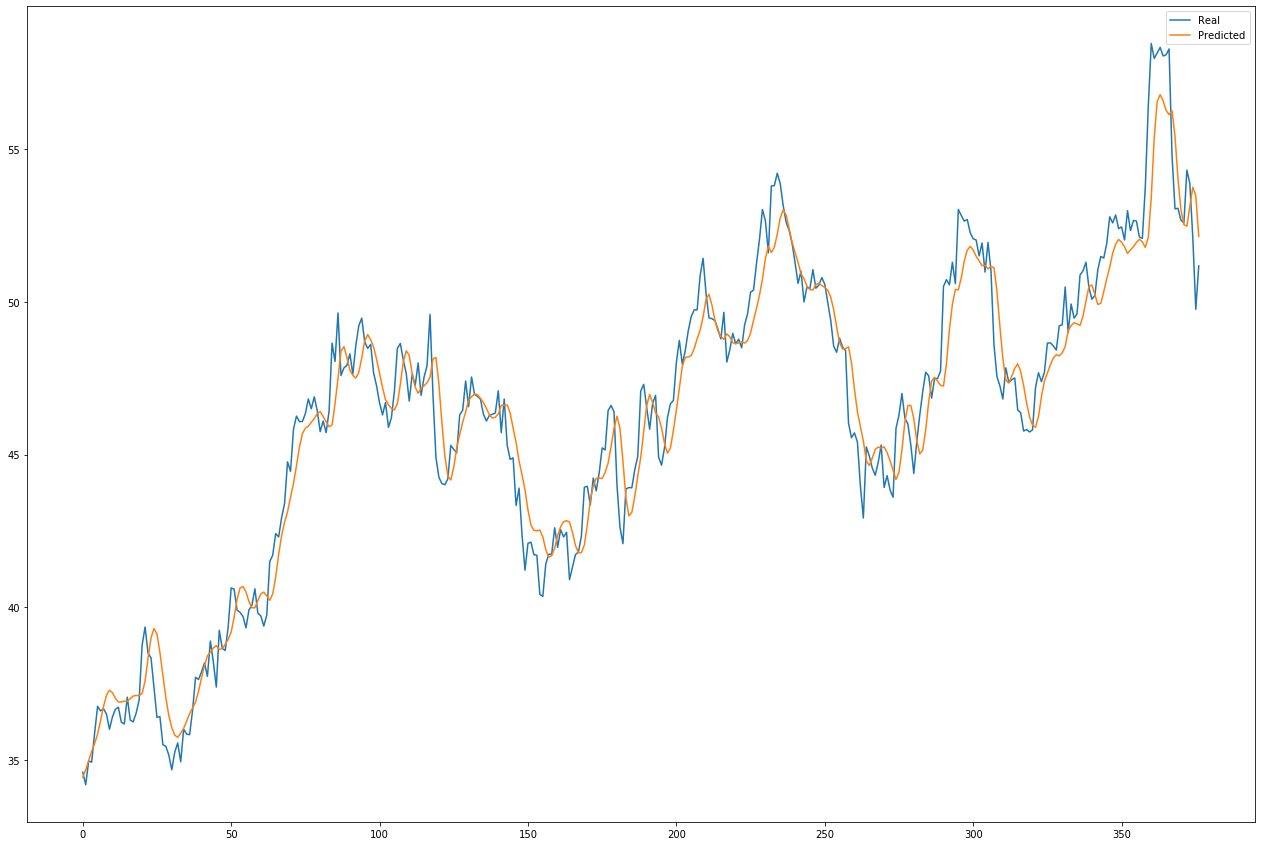

In [161]:
#Grafico con los resultados
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(resultados_reales[start:end], label='Resultados reales')
pred = plt.plot(prediccion_resultante[start:end], label='Resultados predecidos')

plt.legend(['Real', 'Predicted'])

plt.show()

Pese a solo contar con una única variable de entrada, se obtiene un error cuadrático medio mas o menos aceptable. Queda pendiente para un futuro, probar con un Epoch mayor y buscar alguna que otra configuración de la red más óptima.

-------------------------------------------

# Regresión polinomial

In [143]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
grados= [2,3,4]
X_train, X_test, y_train, y_test = train_test_split(dataset_aapl, dataset_output, test_size=0.2, random_state=12)

for grado in grados:
    print("------------------------------------------------------")
    S = RMHC(Pipeline([('polynomial', PolynomialFeatures(degree=grado)),('scaler', StandardScaler()),('regressor', LinearRegression())]), X_train.values, y_train.values)
    print(f"Ejecucion para regresion polinomial de grado {grado}")

------------------------------------------------------
           open       high        low        volume  Dia  Mes   Año  estacion  \
1367   7.805857   7.844100   7.784324   7350.769007   16    7  2013  1.732051   
2125   9.977976  10.000000   9.966945   4876.466344   19    7  2016  1.732051   
1416   8.408157   8.413168   8.347964   9518.558347   24    9  2013  2.000000   
1268   8.011148   8.032073   7.987484   9087.564195   22    2  2013  1.000000   
1393   8.481828   8.511751   8.461672   9154.765207   21    8  2013  1.732051   
...         ...        ...        ...           ...  ...  ...   ...       ...   
1677   9.971459  10.005998   9.936297   6488.003006    7   10  2014  2.000000   
1732  10.610372  10.616497  10.583478   3805.208404   24   12  2014  1.000000   
1308   7.489419   7.580046   7.476390  10360.420937   22    4  2013  1.414214   
1537   8.719925   8.752463   8.693181   7495.929429   19    3  2014  1.414214   
1691  10.239629  10.270346  10.232302   5847.024970   

*Observaciones*: Se puede apreciar que al usar una regresión polinomial con grado 4 se obtienen peores resultados en test, debido a que el modelo aprende demasiado bien el conjunto de entrenamiento.

**Conclusiones** **sobre** **comparativa** **de** **métodos**

Se obtiene un mejor rendimiento aplicando la regresión polinomial, pero ha de tenerse en cuenta que en ésta el número de variables de entrada a utilizar ha sido mayor. Luego para nuestro experimento ha dado mejor resultado, pero en otras condiciones probablemente no sea así por la característica intrínsica de las LSTM.

# Random Forest

Se ha querido probar a usar también Random Forest para la predicción de acciones. Random forest es un modelo bastante robusto ante ruido y outliers, y en general provee buenos resultados. En un problema de predicción, el resultado a predecir será la media de las salidas de lo clasificadores bases que son árboles de decision.

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
todataframe = pd.read_csv('all_stocks_5yr.csv', delimiter=',')
todataframe.dropna(axis=0, inplace = True) 
todataframe = todataframe[todataframe['Name']=='AAL']

atSalida = 'close'
atEntrada = ['open','high','low','volume']
todataframe_output = todataframe[atSalida].copy()
todataframe.drop(atSalida, axis=1, inplace=True)
todataframe = todataframe[atEntrada].copy()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(todataframe, todataframe_output, test_size=0.2, random_state=12)

In [ ]:
randomForest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
randomForest.fit(X_train, y_train)

In [ ]:
predictions = randomForest.predict(X_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
print(f"El MSE es {mean_squared_error(predictions,y_test)}")

In [ ]:
#Grafico con los resultados
plt.gcf().set_size_inches(22, 15, forward=True)
start = 0
end = -1
real = plt.plot(y_test[start:end], label='Resultados reales')
pred = plt.plot(predictions[start:end], label='Resultados predecidos')
plt.legend(['Real', 'Predicted'])
plt.grid()
plt.show()

*Conclusiones* *sobre* *comparativa* *de* *métodos*

Se obtiene un mejor rendimiento aplicando la regresión polinomial, pero ha de tenerse en cuenta que en ésta el número de variables de entrada a utilizar ha sido mayor con respecto a las LSTM. En segundo lugar, en cuanto a resultado obtenido ha sido Random Forest -da buen rendimiento en general-.

Luego para nuestro experimento ha dado como mejor resultado la regresión polinomial, pero en otras condiciones probablemente no sea así por la característica intrínsica de las LSTM

In [94]:
dataset_log

,date,open,high,low,close,volume,Name,Dia,Mes,Año
0,2013-02-08,2.712706,2.716018,2.683074,2.691243,15.944635,AAL,8,2,2013
1,2013-02-11,2.700690,2.708717,2.657458,2.671386,15.999537,AAL,11,2,2013
2,2013-02-12,2.670694,2.674838,2.646175,2.658159,15.910579,AAL,12,2,2013
3,2013-02-13,2.660260,2.704042,2.656757,2.685123,16.143715,AAL,13,2,2013
4,2013-02-14,2.704042,2.705380,2.577182,2.638343,17.277486,AAL,14,2,2013
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,4.341725,4.360164,4.339771,4.354398,14.908192,ZTS,1,2,2018
619036,2018-02-02,4.350665,4.358246,4.340293,4.340944,14.769169,ZTS,2,2,2018
619037,2018-02-05,4.339119,4.342766,4.292922,4.301765,14.901386,ZTS,5,2,2018
619038,2018-02-06,4.286891,4.311604,4.278470,4.294151,15.409697,ZTS,6,2,2018


Reduccion de variables

In [95]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [159]:
dataset_aapl=dataset_valor_anterior[dataset_valor_anterior['Name']=='AAPL'].copy()


In [158]:
#es necesario normalizar la fecha?
dataset_aapl

           date      open      high       low     close       volume  Name  \
1259 2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416.0  AAPL   
1260 2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425.0  AAPL   
1261 2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363.0  AAPL   
1262 2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995.0  AAPL   
1263 2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154.0  AAPL   
...         ...       ...       ...       ...       ...          ...   ...   
2513 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787.0  AAPL   
2514 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825.0  AAPL   
2515 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522.0  AAPL   
2516 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838.0  AAPL   
2517 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580.0  AAPL   

      Dia  Mes   Año  
1259    8    2  2013  
1260   11    2  2

In [163]:
#atSalida = 'close'
atEntrada = ['Dia','Mes','Año','low','high','open']
#todataframe_output = dataset_aapl[atSalida].copy()
#dataset_log.drop(atSalida, axis=1, inplace=True)
#dataset_aapl = dataset_aapl[atEntrada].copy()

X_train, X_test, y_train, y_test = train_test_split(dataset_aapl, todataframe_output, test_size=0.2, random_state=12)
X_train=dataset_aapl[dataset_aapl['Año']<2017].copy()
X_test=dataset_aapl[dataset_aapl['Año']>=2017].copy()
y_train=X_train['close'].copy()
y_test=X_test['close'].copy()
X_train=X_train[atEntrada]
X_test=X_test[atEntrada]


In [166]:
X_train[S].values.shape

(98, 6)

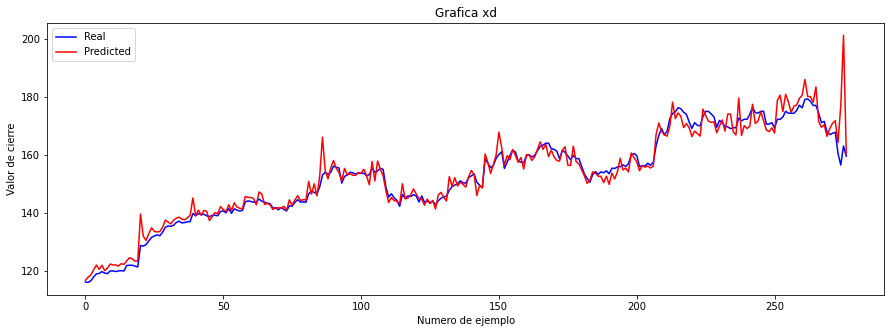

El error en entrenamiento con el dataset  es 1.6357 y en test es 13.0511


In [165]:

p_degree=2
# Creamos una Pipeline en la que generamos variables polinómicas de grado 2, estandarizamos los datos y aprendemos una regresión lineal
pipePolinomial = Pipeline([('polynomial', PolynomialFeatures(degree=p_degree)),('scaler', StandardScaler()),('regressor', LinearRegression())])
# Entrenamos la Pipeline
pipePolinomial.fit(X_train[S], y_train[S])
# Obtenemos el rendimiento en entrenamiento y en test (MSE)
prTrain = pipePolinomial.predict(X_train)
errorTrain = mean_squared_error(y_train, prTrain)
prTest = pipePolinomial.predict(X_test)
errorTest = mean_squared_error(y_test, prTest)
plt.gcf().set_size_inches(15, 5, forward=True)
real=plt.plot(np.arange(len(y_test)),y_test,c="blue", label='Resultados reales')
pred=plt.plot(np.arange(len(y_test)),prTest,c="red", label='Resultados reales')
plt.xlabel("Numero de ejemplo")
plt.ylabel("Valor de cierre")
plt.title("Grafica xd")
plt.legend(['Real', 'Predicted'])
plt.show()
print('El error en entrenamiento con el dataset  es {:.4f} y en test es {:.4f}'.format(errorTrain, errorTest))